# EDA

[colaboratory로 실행](https://colab.research.google.com/drive/1cY-lxdJdPHqxQLGYWo6RwK4Iy8Dolwv1?usp=sharing) \

- 데이타의 탐색적 분석은 기본 분석과 시각화를 통해서
  수집된 테이터에 대한 이해를 높이고 수집된 대상 필드(또는 대상, 현상 등)에 대한 이해를 높이기 위해서 시행합니다.
- 데이터의 이해를 높임으로써 분석의 목표에 대한 성과를 높있을 수 있는 분석 방법과 모델 개발을 연구할 수 있게 됩니다.
- 또한 기본적인 탐색 분석에서 데이터의 기본 검증과 정제 방법이 수립되거나 BASE 모델이 수립되기도 합니다.

- 데이터셋을 kaggle에서 EDA 분석으로 많은 포인트를 받은 분석을 레퍼런스로 사용하여 진행하겠습니다.

- 데이터는 해당 레퍼런스와 같이 타이타닉 생존 데이터를 사용합니다. 원본 레퍼런스에 코드 에러를 수정하고 설명을 넣었습니다.

https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

- 사실 타이타닉과 같은 데이터는 특별합니다. 모집단에 대해서 측정된 데이터가 모수를 다 나타내고 있기 때문입니다. (모든 feature 에 따른 경우에 수가 그대로 모수의 특징이 됩니다. 현실에서는 통계적 확률추정값이 됩니다.)

In [1]:
# data file upload
!gdown https://drive.google.com/uc?id=1qywvj2xQe7fnLBYa0MsxbKpQw5u3WFVi

zsh:1: no matches found: https://drive.google.com/uc?id=1qywvj2xQe7fnLBYa0MsxbKpQw5u3WFVi


In [7]:
# 데이터 조작 도구
import numpy as np
import pandas as pd

# 통계적 카이제곱 분석
from scipy.stats import chi2_contingency, chisquare, chi2

# 시각화
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# python 경고무시
import warnings
warnings.filterwarnings('ignore')

## dataset load
# ttn = sns.load_dataset('titanic')
# ttn.head()

ttn=pd.read_csv('./data/Titanic-Dataset.csv')
ttn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
ttn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 기본적으로 Dataset의 Null 즉, missing value 여부를 파악합니다.
- 경우에 따라서 missing value 자체가 정보가 되기도 하지만 대부분의 경우는 제거하거나 처리해야하는 대상입니다.
- missing value 를 다루는 기법 자체가 중요한 데이터 분석 분야라고  할 수 있습니다.

- 가장 기초적인 방법으로는
  1) 대상 샘플 제거

  2) 평균 입력

  3) 최빈치 입력

  4) 보간법

  5) 다른 feature를 이용한 예측 모델

  기타 등등 많은 방법이 사용되고 연구 되고 있습니다.



In [9]:
ttn.isnull().sum()  # isnull 메서드를 사용하여 null 여부의 boolean 값을 받아오고 그 수를 합산합니다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 아직 matplotlib 에 관해서 배우지는 않았지만 코드의 설명을 따라서 사용해 봅시다.

- 현재 분석의 목적은 결국 데이터 분석의 목적인 생존여부  "Survived"  feature 또는 target value 에 대한 label balance를 직관적으로 확인하기 위해서 상대적인 class category의 비중과 빈도를 그래프로 시각적이고 직관적으로 확인하고자 하는 의도입니다.

- 전체적인 데이터셋의 특성을 파악하기 적에 직접적으로 접근하네요.

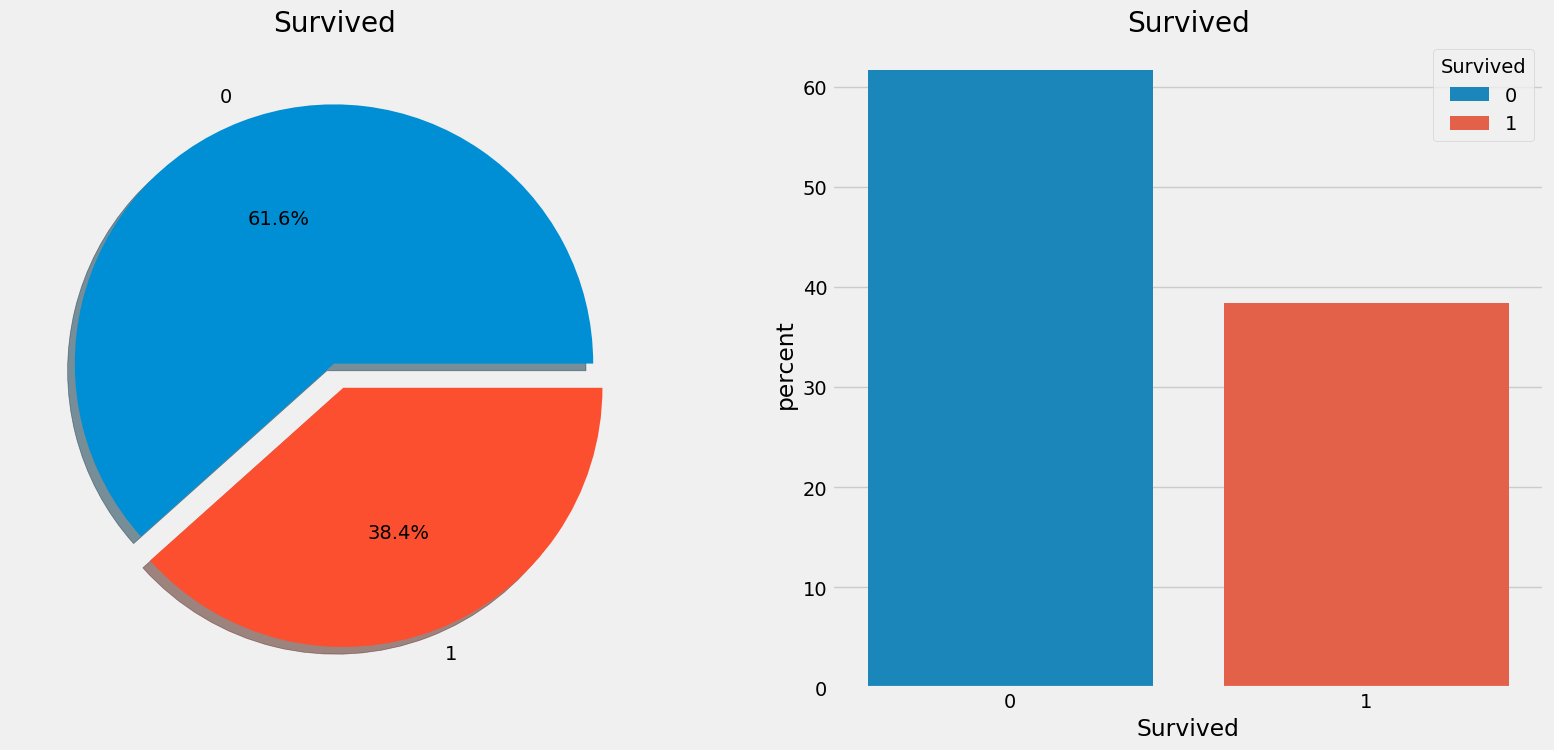

In [4]:

# 하나의  figure에 다수의 plot을 생성하기 위해서 subplots 를 사용하고 있습니다.
# 1, 2 는 (세로, 가로)로 몇개의 축(axis)를 넣을 것인지 정하는 것입니다. 축을 넣는 다는 것은 그래프를 넣는 다는 뜻입니다.
# 여기 코드에서는 세로 1, 가로 2개이네요
# figsize는 출력되어 나오는 전체 이미지의 바탕이 되는 figure 의 크기를 지정합니다.
fig,axes =plt.subplots(1,2,figsize=(18,8))

ttn['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True)
# 데이터도 직접적으로 접근하네요. dataframe 에 직접 컬럼명으로 접근하고 빈도를 value_counts 메서드로 구해서
# 바로 pie plot 으로 보냈습니다.
# 분석가의 성격이 보이네요.

# figure 는 하나이지만 subplots 로 2개의 축자리를 만들었고 그중 첫번째 0번의 축자리에  그래프와 세팅을 합니다.
axes[0].set_title('Survived') # 그래프의 타이틀을 세팅합니다.
axes[0].set_ylabel('') # y축의 label은 빈칸으로 입력했네요

# seaborn의  countplot을 사용하여 빈도표를  survived feature의 카테고리로 색을 표시해고 scale은 percentage를 사용했습니다.
sns.countplot(ttn, x='Survived',hue="Survived", stat="percent")
axes[1].set_title('Survived')
plt.show()

- 그래프로 볼 수 있듯이 타겟 label 의 balance가 아주 좋지는 않지만 그렇다고 일반적인 anormal detection 이나 예측에 사용되는 lable 치고는 상당히 balance가 있네요. 분석모델에서 학습을 위해서 해당 데이터의 balance 조정을 할지는 분석가가 고려해야할 사항이 되겠네요.

- 일반적으로 balance를 맞춰주기 위해서 upsampling과 downsampling 또는 argumnet sampling 등 이뤄집니다. 최근에는 SMOTE 라는 증강 방법을 많이 사용합니다.


- 원 래퍼런스에서는 여기서 데이터의 feature 종류를 설명하고 있네요.

    (1) 빈도용 분류만 가능한 카테고리 feature (통계에서는 "명목척도"라고 합니다.)

    (2) 선-후 순서나 순위는 파악할 수 있는 기수 feature (통계에서는 "등간척도"와 유사하네요. 세부적으로 등급에 여부를 따져보와야 겠지만요)

    (3) 마지막은 연속형 feature로 상대적인 비율을 scale 가진 경우이네요 (통계에서는 "등비척도" 라고하겠네요.)

- 각 feature 가 가지는 특성과 특징을 파악하는 것은 중요한 작업입니다. 사실 수집된 해당 분야의 전문지식이나 경험이 필요할 수도 있는 부분입니다.

- 해당 래퍼런스에서는 컬럼 별로 예시를 들면서 설명하고 있네요.

  > 사실 개인적으로는 이런 경우 해당 대상의 전문가 또는 분석에 목적에 맞는 논리와 배경을 같이 정리하는 것이 좋다고 생각합니다.
  해석이나 논리의 관점이 없는 경우 비효율과 분석모델과의 연계성이 떨어지는 경우가 많습니다. 물론 탐색이라는 말그대로 탐색을 위한 진행이지만 탐색하는 과정을 통해서 지속적인 논리를 찾아가는 것이 중요하다고 생각합니다.

- 사실 해당 래퍼런스도 저와 같은 생각이네요 스스로 이야기를 풀어가고 있네요.

 성별을 통해서 접근하면서 여성의 생존율이 탑승인원 내에서 상대적으로 매우 높게 나온 결과를 보이네요.

 왜 그럴까요?


In [5]:
# pandas의 groupby 를 사용하여 count 메서드를 성별로 적용했네요.
ttn.groupby(['Sex','Survived'])['Survived'].count()
# 성별을 분류 feature(명목척도)로 구분했네요.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

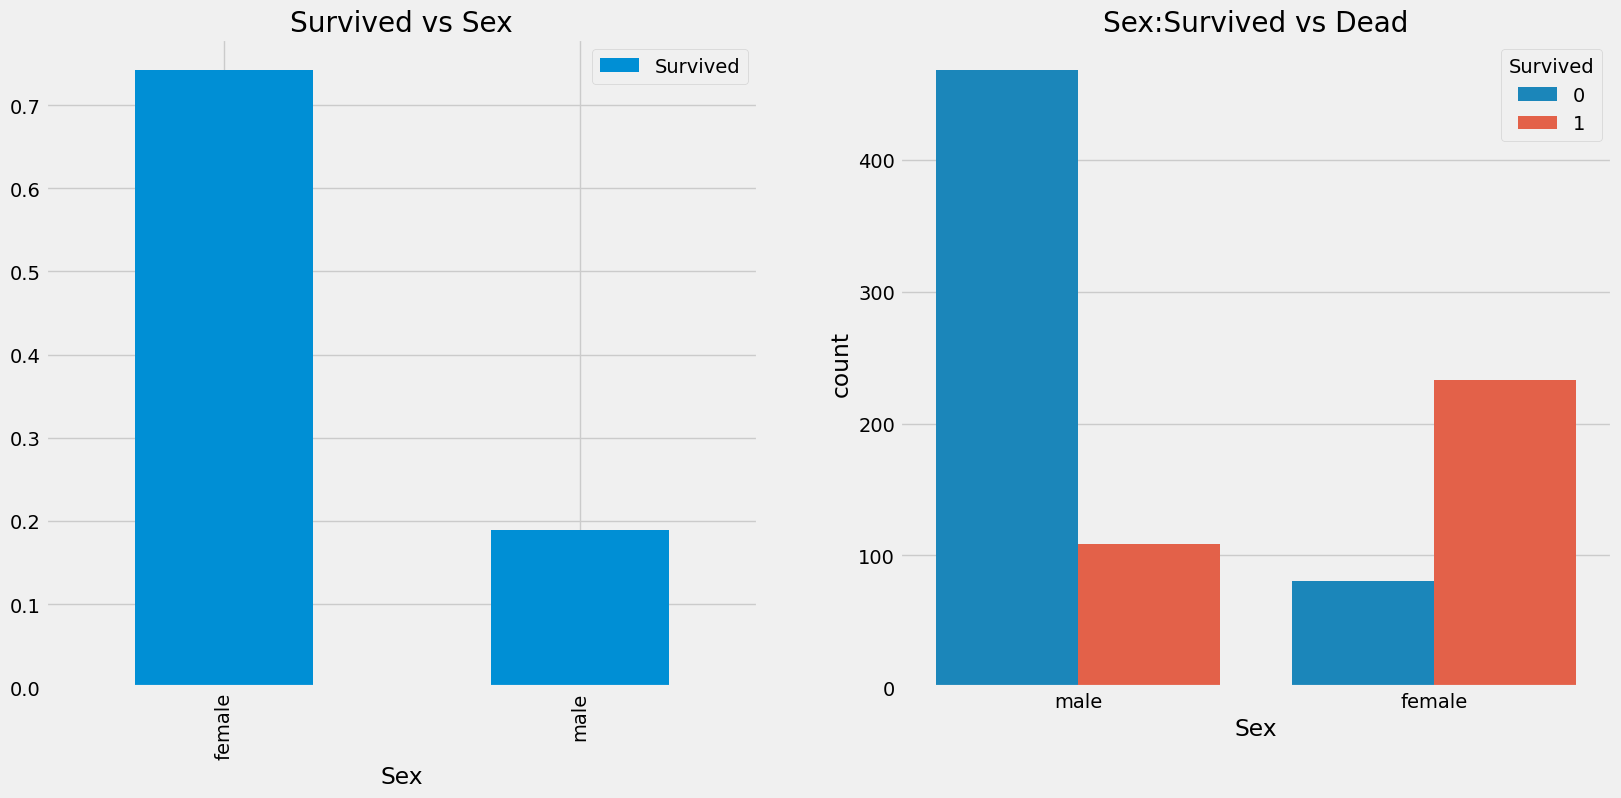

In [6]:
fig,axes=plt.subplots(1,2,figsize=(18,8))
ttn[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0])
axes[0].set_title('Survived vs Sex')
sns.countplot(ttn, x='Sex',hue='Survived',ax=axes[1])
axes[1].set_title('Sex:Survived vs Dead')
plt.show()

- 통계적으로 성별 간의 생존 차이가 의미 있는지 확인해 볼까요?
- 보통 통계적으로 명제를 검증 할때는 가설을 세웁니다.

- 우리가 세우는 가설 (새로운 주중)과 관계 없는 기존의 일반적인 설명을 귀무가설이라고 합니다.
- 여기서 귀무가설은 : 성별에 따라 생존의 차이는 없다. 가 됩니다.
- 이러한 귀무가설에 대해서 우리가 예상하는 또는 주장하는 가설을 대립가설 이라고 합니다.
- 여기서 대립가설은 : 성별에 따라서 생존의 차이가 있을 것이다. 가 됩니다.

- 검증에 사용되는 통계적 검증은 카이제곱 분포를 사용하겠습니다.

  (T-test : 정규분포를 가정한 파라메티 검정 분석 가능,
  그러나 T 테스트는 독립성,정규화, 등분산 조건을 만족해야합니다.)

- 검증기준은 유의확률 p-value : 0.05 로 하겠습니다.

- 즉, 카이제곱 분포로 보았을 때 대립가설이 채택되기 위해서는 0.05 보다 낮아야 한다는 뜻입니다.




In [7]:
# 통계적으로 성별 간의 생존 차이가 의미 있는지 확인해 볼까요?
# scipy 의 ch2_contingency 로 카이분포 검정을 실시합니다.
df_sex = pd.crosstab(ttn.Survived, ttn.Sex)
print(df_sex)
chi2_contingency(df_sex)

Sex       female  male
Survived              
0             81   468
1            233   109


Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))


- 결과는 아래와 같습니다. p-value 가 1.197357e-58 로 나와 0.05 보다 한참 낮은 것을 볼 수 있습니다.
- 따라서 대립가설을 기각시키지 못하여 우리의 주장대로 성별은 생존과 관계가 있는 현상일 가능성이 타이타닉 데이터에서는 높게 나타났습니다.

In [8]:
# 선실의 등급을 기수 feature (등간척도)라고 설명합니다..

pd.crosstab(
          ttn.Pclass,
          ttn.Survived,
          margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 타이타닉에 탑승한 선실의 등급과 생존에 관한 접근을 하고 있습니다. 각 선실 등급에 따라서 선실 등급 탑승 인원에 내에서 생존 비율이 차이를 눈으로 확인할 수 있습니다.
- 선실 등급이 높을 수록 생존비율이 높네요.

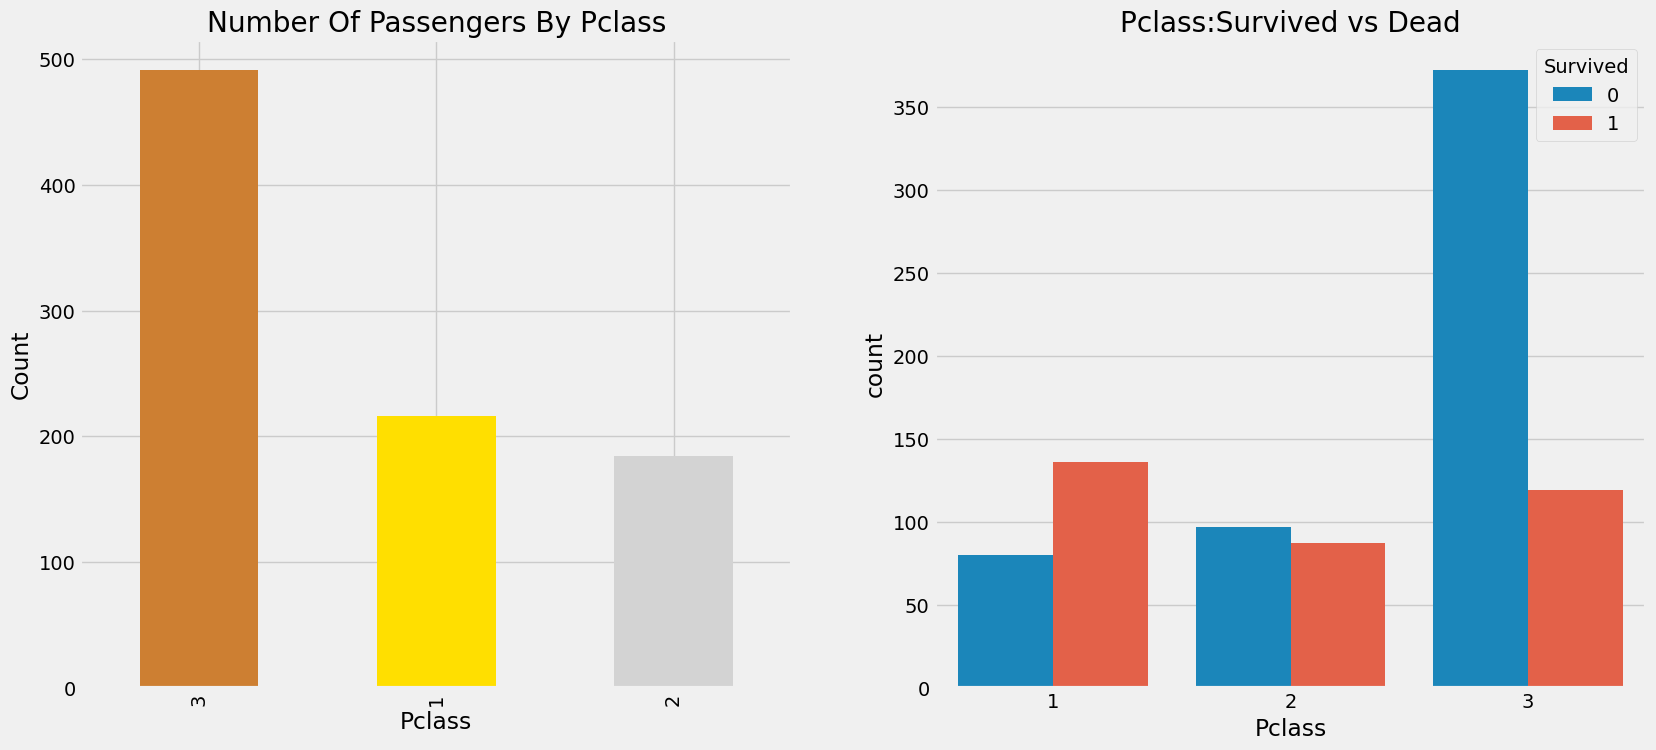

In [9]:
fig,axes=plt.subplots(1,2,figsize=(18,8))
ttn['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=axes[0])
axes[0].set_title('Number Of Passengers By Pclass')
axes[0].set_ylabel('Count')
sns.countplot(ttn, x='Pclass',hue='Survived')
axes[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 다음은 성별과 함께 선실등급을 함께 고려하여 메트릭스로 데이터를 들여다 보고 있습니다. feature를 고려한 상황의 경우를 같이 들여다 보고 있네요.


In [10]:
pd.crosstab(
            [ttn.Sex,ttn.Survived],
            ttn.Pclass,
            margins=True
            ).style.background_gradient(cmap='summer_r')

- 카이 스퀘어 검정도 한번 진행해 볼수 있겠네요.

In [ ]:
### pclass에 대해서 카이제곱 검정을 진행해 보세요

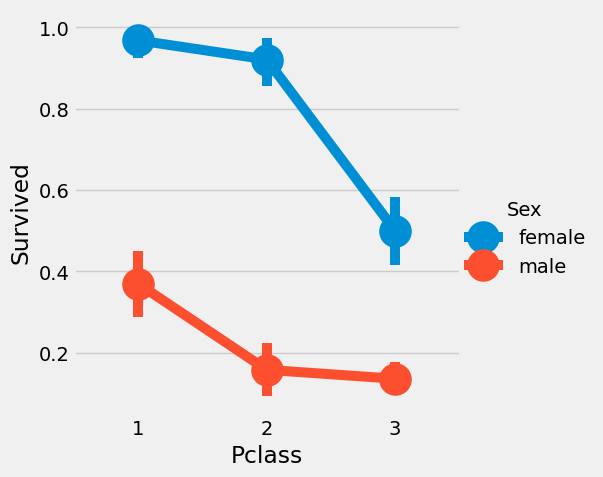

In [11]:
# 테이블 형태의 경우의 수말고 직관적인 형태의 그래프로도 살펴보고 있네요

sns.catplot(x='Pclass',y='Survived',data=ttn, kind="point", hue='Sex')
plt.show()

- 논리적으로 보았을 때 1 선실에 여자일 경우 생존가능성이 제일 높다고 볼 수 있네요


- 그다음 데이터의 feature의 종류 중 연속형 데이터(등비척도)를 다루네요

- 이러한 연속형은 수치(numeric)와 단위(scale)를 가지며 연산이 가능하겠죠?

- 그래서 데이터 feature 가 가지는 수치의 범위와 수집된 데이터의 분포가 중요합니다.

- 먼저 데이터의 범위를 확인하기 위해서 최소값과 최대값 그리고 평균을 구하네요.

In [12]:
print('Oldest Passenger was of:',ttn['Age'].max(),'Years')
print('Youngest Passenger was of:',ttn['Age'].min(),'Years')
print('Average Age on the ship:',ttn['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


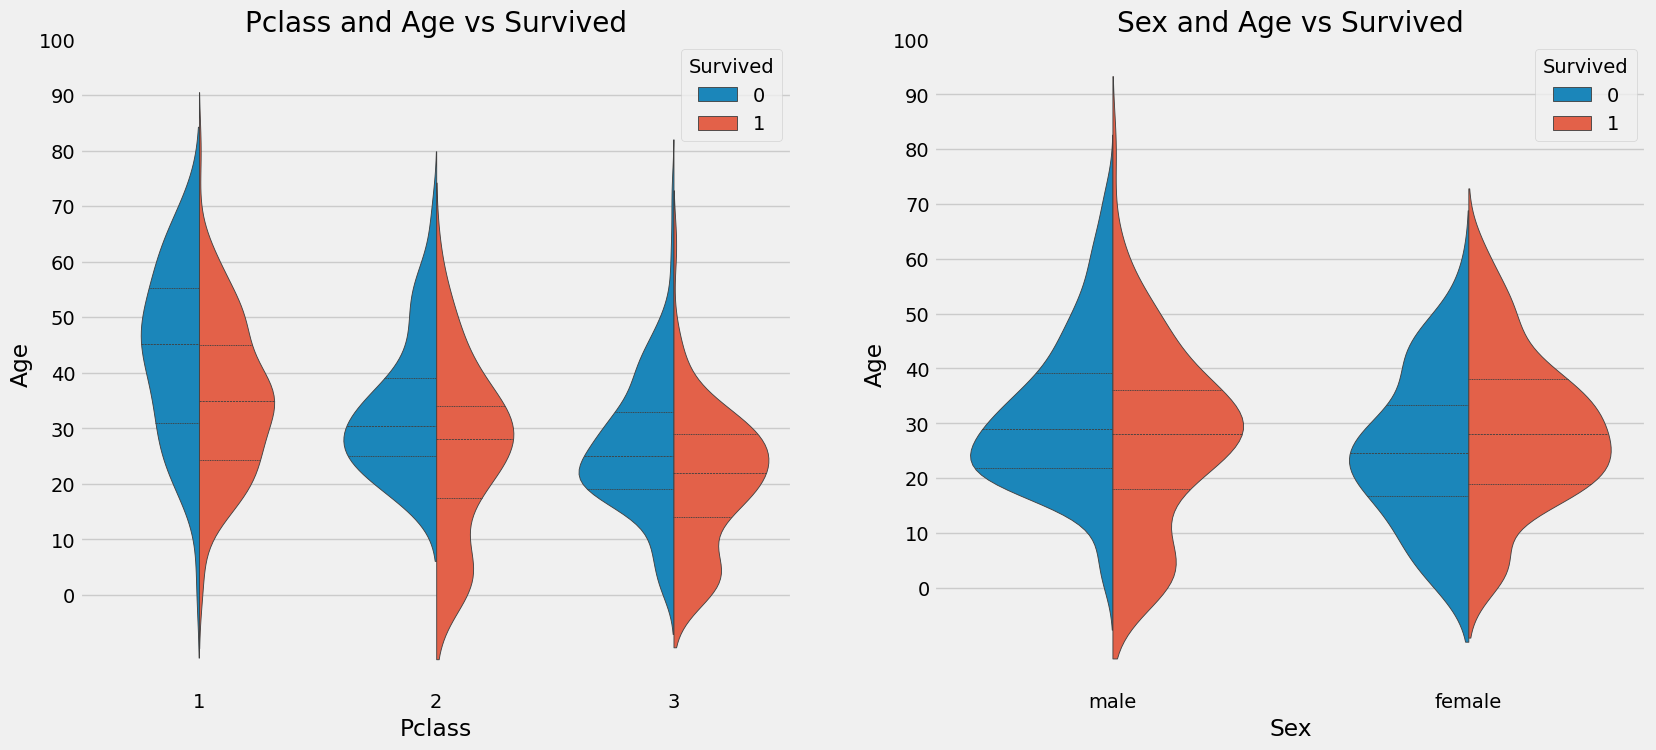

In [13]:
fig,axes=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=ttn,x="Pclass",y="Age", hue="Survived",split=True,ax=axes[0],inner="quart")
axes[0].set_title('Pclass and Age vs Survived')
axes[0].set_yticks(range(0,110,10))
sns.violinplot(data=ttn, x="Sex",y="Age", hue="Survived", split=True,ax=axes[1],inner="quart")
axes[1].set_title('Sex and Age vs Survived')
axes[1].set_yticks(range(0,110,10))
plt.show()

- 이 분석 래퍼런스에서는 앞에서 확인한 missing value 중에 나이에 관한 177에 대한 처리를 위해서 데이터셋에 있는 이름에 주목하고 있습니다.
- 이름에 나타난 직위, 특성, 대명칭 등을 통해서 나이대의 카테고리 분류를 만들고 있습니다.


In [14]:
ttn['Initial'] = 0 # Dataset 에 초기화 feature 컬럼을 하나 만드네요.
for i in ttn:      # Dataset 에서 각 행을 하나씩 가져옵니다.
    ttn['Initial']=ttn.Name.str.extract('([A-Za-z]+)\.') # 정규문자열 형태를 통해서 이름의 이니셜 형태의 문자를 추출하네요.

In [15]:
pd.crosstab(ttn.Initial,ttn.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
# 추가적으로 같은 유형의 이니셜 카테고리를 같게 하기 위해서 문자열을 대체해 주네요.
ttn['Initial'].replace(
                        ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

 - 상당히 좋은 아이디어였네요. 항상 이런 방식이 통할 지는 모르겠습니다.
 - 그래도 해당 데이터에서는 성별과 이름을 비교하고, 시대의 문화를 고려하면 의미가 있다고 볼수 있겠습니다.
 - 현대시대라면 조금 위험 할수도 있겠네요. 다만 위에 테이블에서 보는 바와 같이 분석자도 2차적으로 성별을 통해서 신뢰도를

In [17]:
ttn.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- 결국 이름의 호칭과 이니셜을 통해서 해당 이니셜 카테고리에 평균 나이를 구하였네요.
- 그리고 이름을 이용하여 나이('Age') feature 의 missing value 를 평균값으로 대체하고 있습니다.

In [18]:
ttn.loc[(ttn.Age.isnull())&(ttn.Initial=='Mr'),'Age']=33
ttn.loc[(ttn.Age.isnull())&(ttn.Initial=='Mrs'),'Age']=36
ttn.loc[(ttn.Age.isnull())&(ttn.Initial=='Master'),'Age']=5
ttn.loc[(ttn.Age.isnull())&(ttn.Initial=='Miss'),'Age']=22
ttn.loc[(ttn.Age.isnull())&(ttn.Initial=='Other'),'Age']=46

In [19]:
ttn.Age.isnull().any()

False

- 이제 나이에 대해서는 결측값이 없게 되었네요.

- 이후 연속적인 데이터 feature 인 'Age'에 대한 분포를 히스토그램 그래프로 생존과 비생존으로 나눠 확인하고 있습니다.

- 분포를 통해서 분석자는 5살 이하 아기들과 여성이 많이 생존한 것을 확인하고 이를 통해 여성과 아이들 먼저라는 원칙이 있었음을 주장하고 있네요.

- 그리고 30~40 대 나이에 사망자 빈도가 최대인것을 들고 있네요.
- 개인적으로는 생존자에서도 최고 생존 나이대가 같은 것을 고려해서 청년층의 사망 빈도가 의미있으려면 사망과 생존의 비율을 가중치로 사용해야 하지 않을까 싶네요.

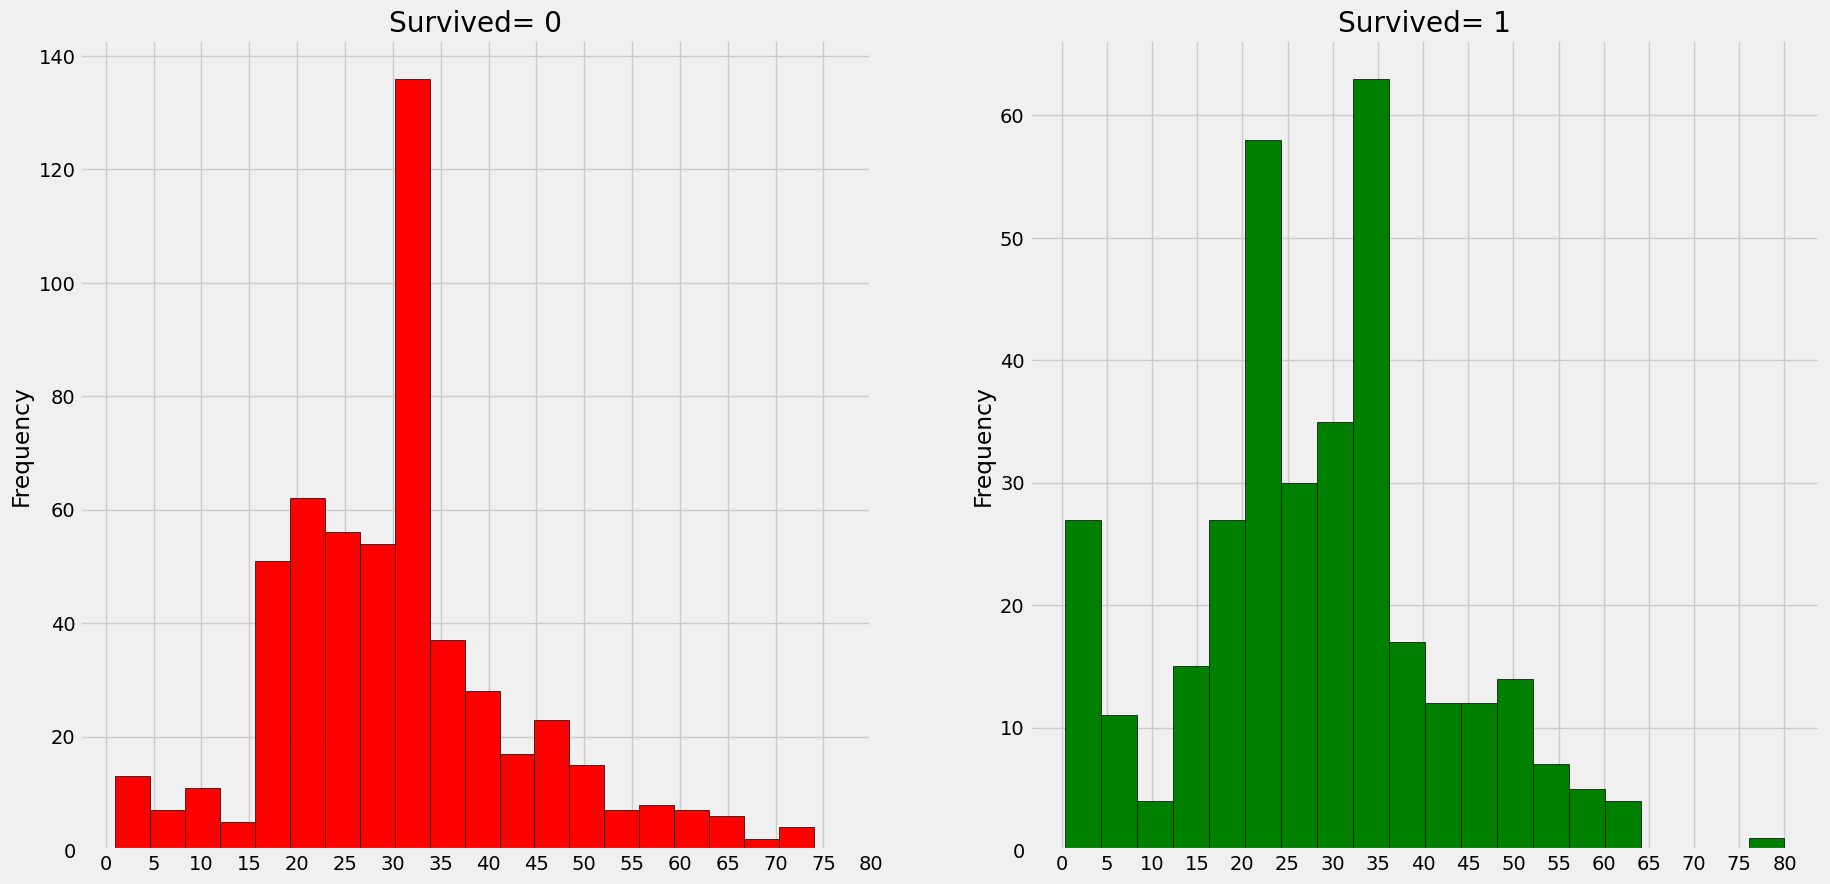

In [20]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
ttn[ttn['Survived']==0].Age.plot.hist(ax=axes[0],bins=20,edgecolor='black',color='red')
axes[0].set_title('Survived= 0')
x1=list(range(0,85,5))
axes[0].set_xticks(x1)
ttn[ttn['Survived']==1].Age.plot.hist(ax=axes[1],bins=20,edgecolor='black',color='green')
axes[1].set_title('Survived= 1')
x2=list(range(0,85,5))
axes[1].set_xticks(x2)
plt.show()

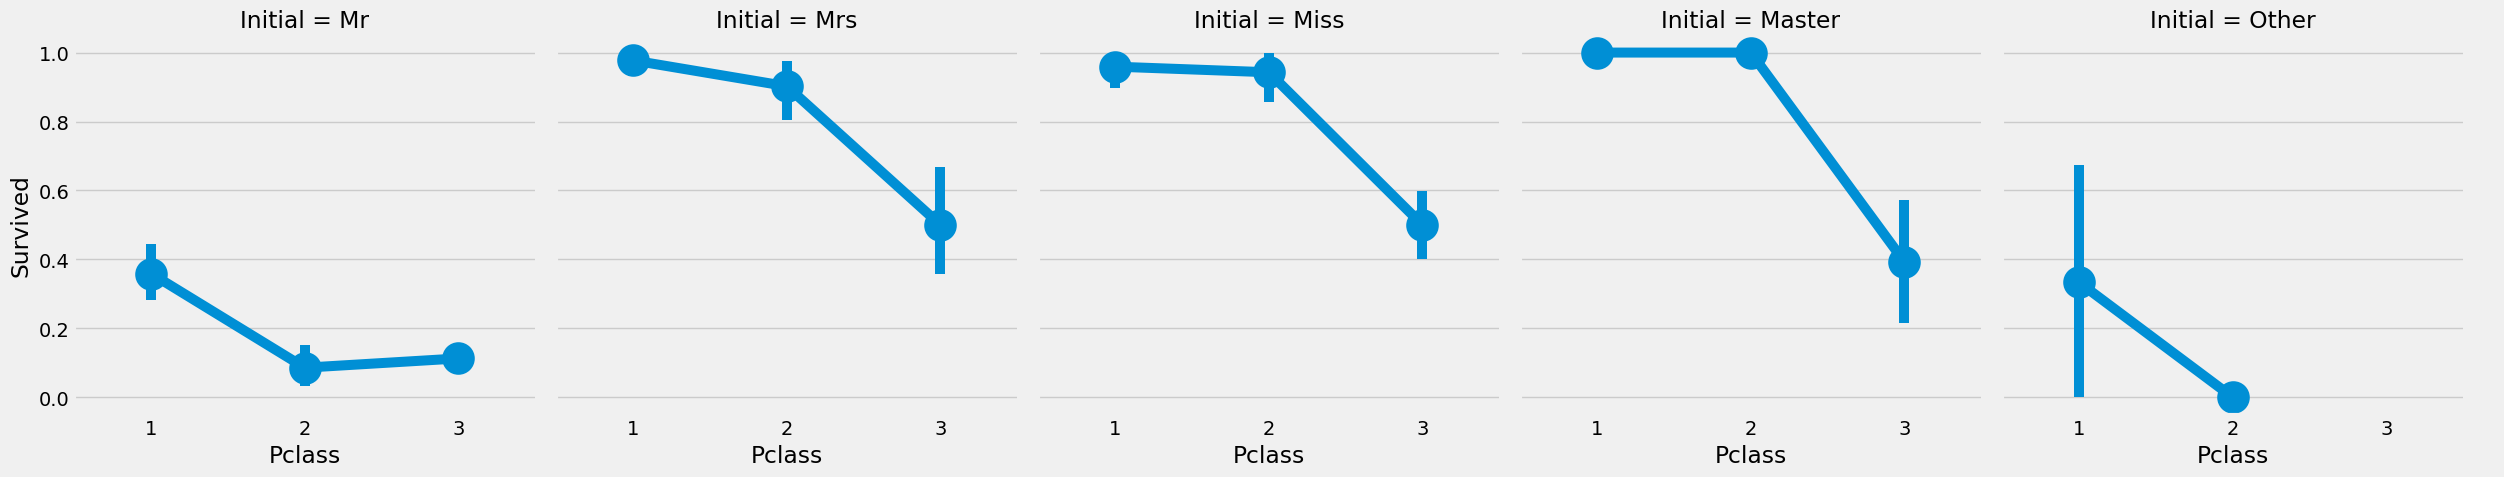

In [21]:
sns.catplot(x='Pclass',y='Survived',col='Initial', data=ttn, kind="point")
plt.show()

- 다시한번 자신의 이름 feature를 이용한 결측값 데이터 대체가 등급 feature 와 연계해서 볼때도 생존률이 분리 된다고 보고 있네요.
- 개인적으로 나이 값을 대체한 근거로는 조금 부족해 보이네요.
- 차라리 군집분석을 통해서 같은 이니셜이름이 같은 나이대로 분류 되는지 검정하는 것이 어땠을까 싶습니다.

- 다음으로 승선한 항구에 따른 생존과의 분류를 진행합니다.
- C 항구 탑승이 55%에 가깝게 나왔고 분석가는 이에 관심을 가지네요

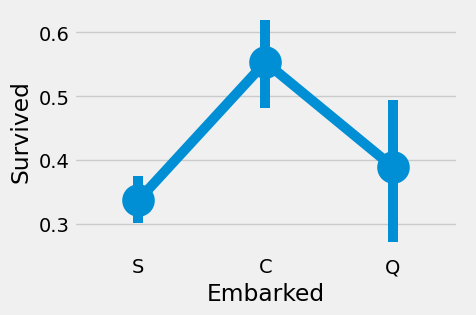

In [22]:
sns.catplot(x='Embarked',y='Survived', data=ttn, kind="point")
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

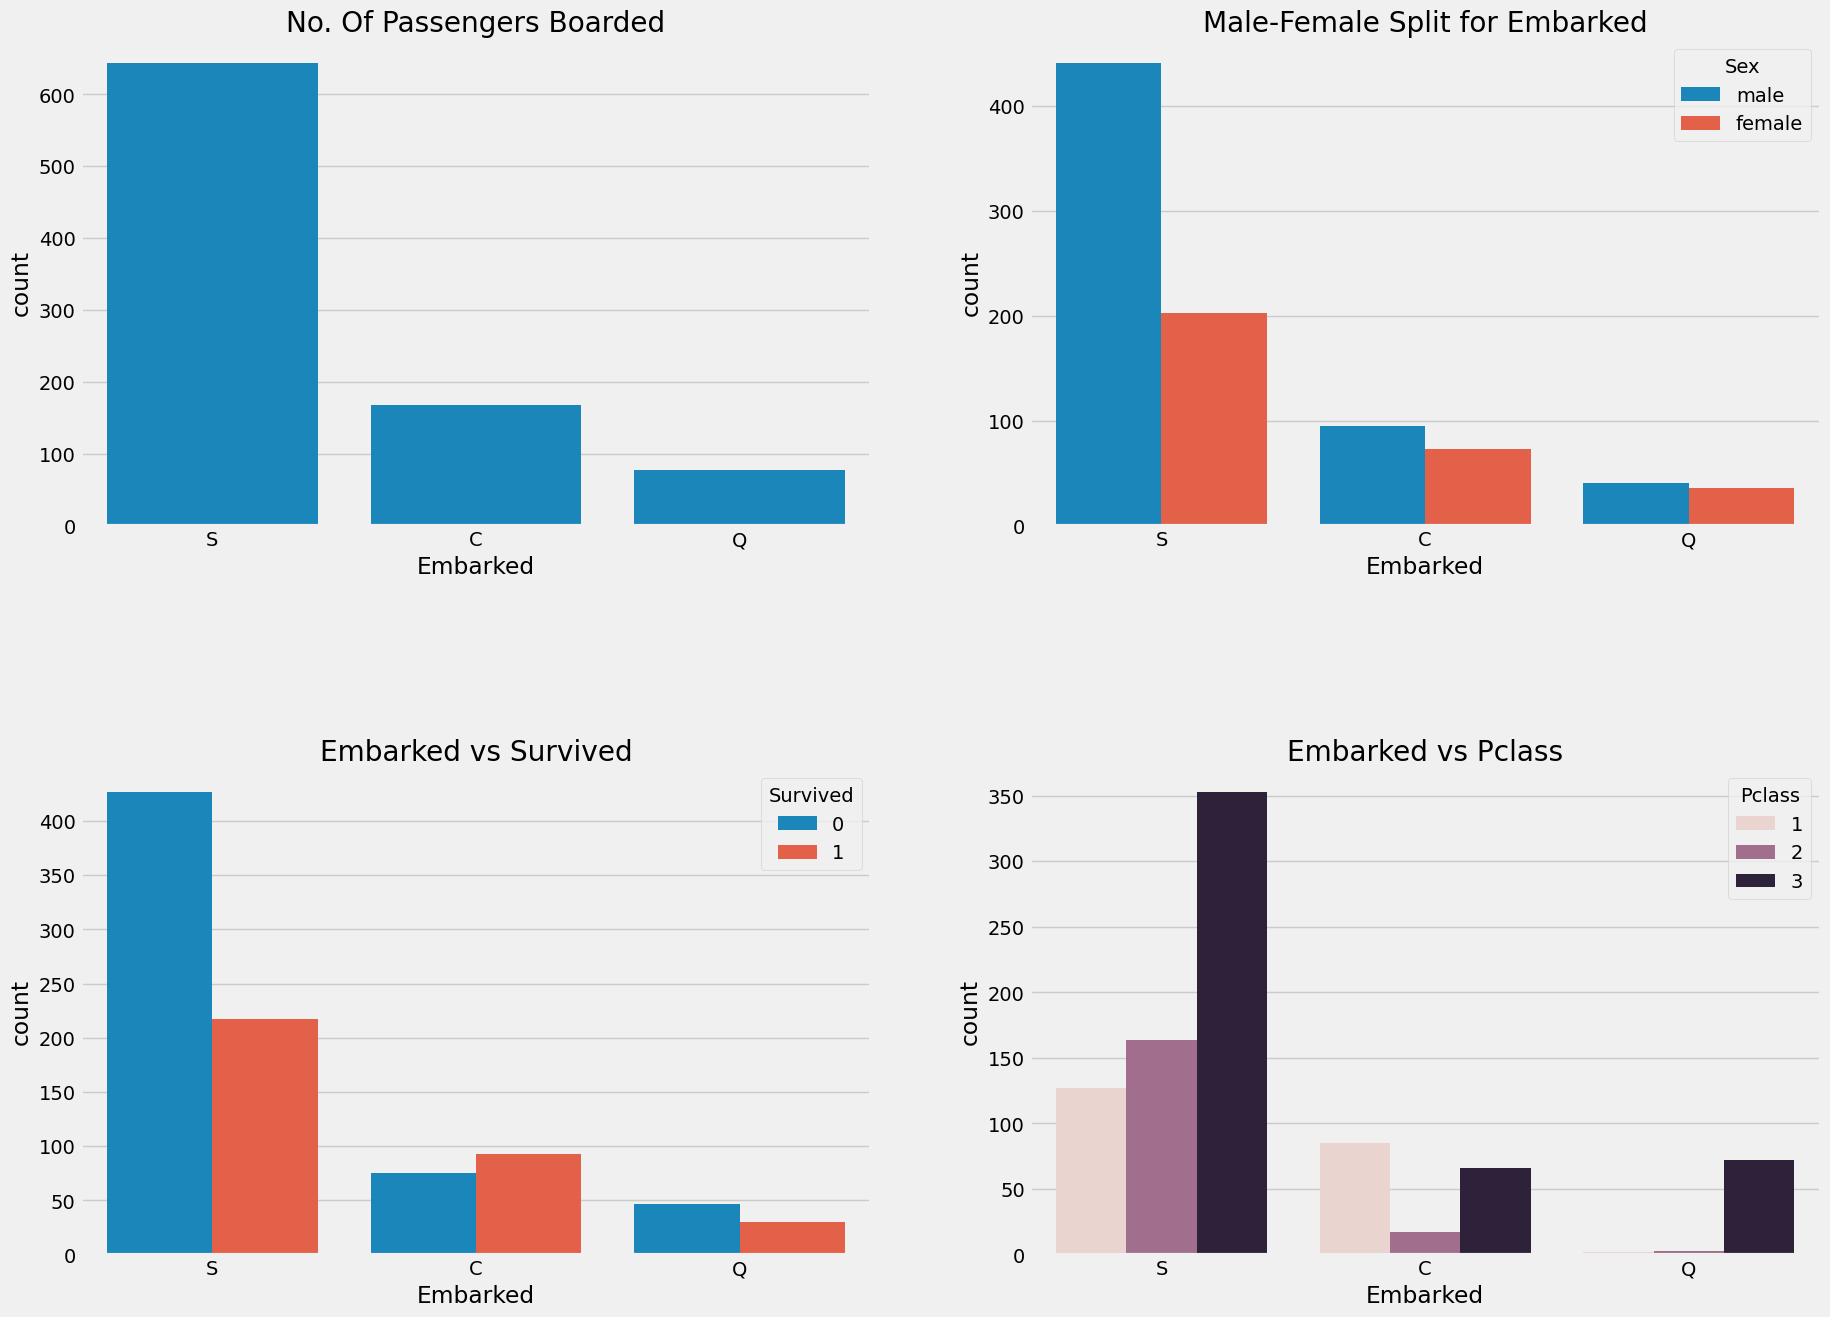

In [23]:
fig,axes=plt.subplots(2,2,figsize=(20,15))

sns.countplot(data=ttn,x='Embarked',ax=axes[0,0])
axes[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(data=ttn,x='Embarked',hue='Sex',ax=axes[0,1])
axes[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(data=ttn,x='Embarked',hue='Survived',ax=axes[1,0])
axes[1,0].set_title('Embarked vs Survived')
sns.countplot(data=ttn,x='Embarked',hue='Pclass',ax=axes[1,1])
axes[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- 분석가는 C 항구 탑승자의 생존율이 높은 이유를 운이 좋았다고 하네요. 1등급과 2등급 객실이 모두 구출되었기 때문이라고 생각합니다.
- 사실 조금 부족한 설명 같습니다. 4번째 표에서 보면 3등급실에 상대적으로 많이 타고 있기 때문입니다. 다른 이유가 있지 않을까요?

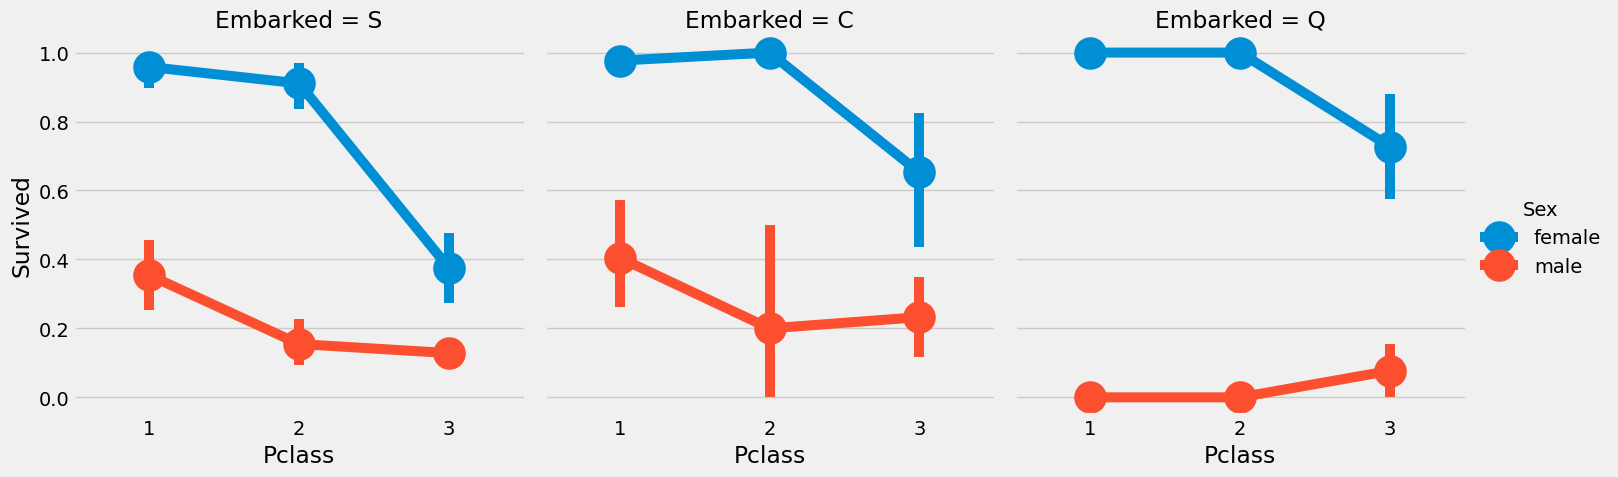

In [24]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',kind="point",data=ttn)
plt.show()

- 분석가는 상당히 그래프를 통한 직관적인 해석을 좋아 하는듯 합니다.
- 저도 직관적인 통찰을 좋아하지만 데이터분석가는 너무 이러한 통찰력에 의존하면 위험할 수 있습니다.
- 통찰은 통찰이고 수치적 증거를 추구하여야 합니다.
- 통계적 검증 방법을 고려하여야 합니다.


- 다음으로 해당 feature 에 대한 결측값을 대체하고 있습니다.
- 방법은 최고 많은 탑승객이 탔던 S 항구로 (최빈도 데이터로) 대체하고 있네요.
- 사실 총 데이터에 대해서 얼마만큼의 프로포션인지 확인을 먼저 해야합니다.


In [25]:
ttn['Embarked'].fillna('S',inplace=True)
ttn.Embarked.isnull().any()

False

- 다음으로 동반 승선에 관한 feature 정보입니다.
- 래퍼런스에 따르면 각 value 는 분류를 뜻하는 것 같습니다.
- 형제, 자매, 의붓형제, 의붓자매, 남편, 부인 을 뜻하는 것 같습니다

In [26]:
pd.crosstab([ttn.SibSp],ttn.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


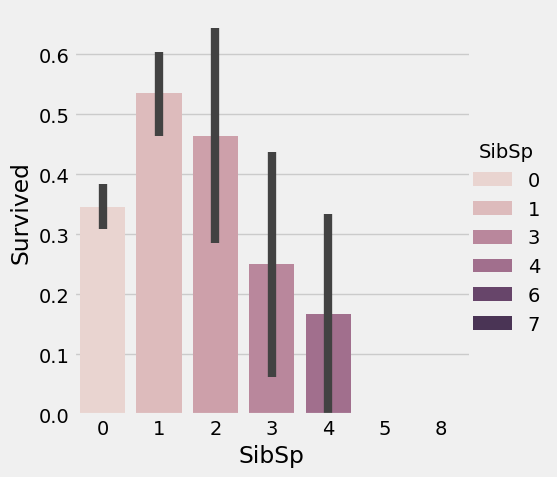

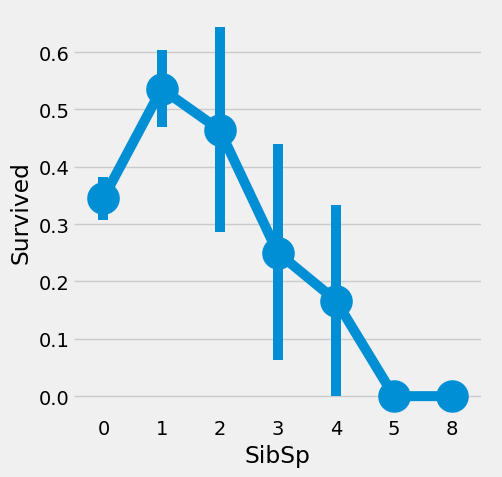

In [27]:
fig,axes=plt.subplots(1,2,figsize=(8,20))
sns.catplot(x='SibSp',y='Survived',kind='bar',hue='SibSp',data=ttn,ax=axes[0])
axes[0].set_title('SibSp vs Survived')
g=sns.catplot(data=ttn,x='SibSp',y='Survived',kind="point",ax=axes[1])
axes[1].set_title('SibSp vs Survived')
g.despine(left=True)
plt.close(1)
plt.show()

In [28]:
pd.crosstab(ttn.SibSp,ttn.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 가족이 있을 경우 가족을 살리기 위해 생존율이 낮아진다고 분석자는 이야기 하네요.
- 또한 1등급 선실보다 3등급 선실이 대가족이라고 분석합니다.

In [29]:
pd.crosstab(ttn.Parch,ttn.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


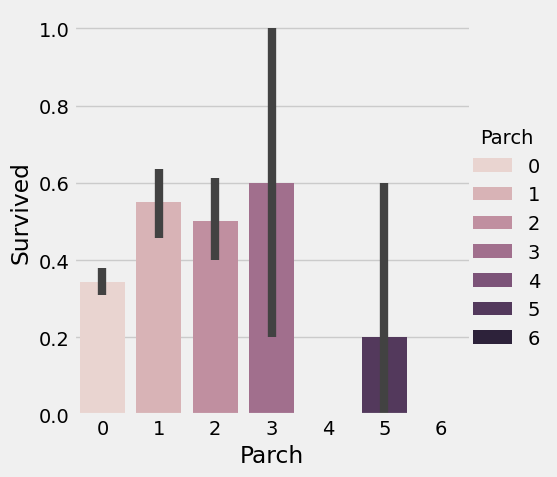

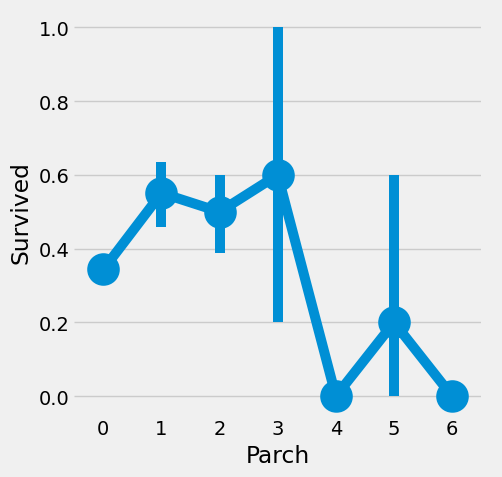

In [30]:
fig,axes=plt.subplots(1,2,figsize=(8,20))
sns.catplot(x='Parch',y='Survived',kind='bar',hue='Parch',data=ttn,ax=axes[0])
axes[0].set_title('Parch vs Survived')
g=sns.catplot(data=ttn,x='Parch',y='Survived',kind="point",ax=axes[1])
axes[1].set_title('Parch vs Survived')
g.despine(left=True)
plt.close(1)
plt.show()

- 지금까지와 같은 방식으로 분석이 이어집니다.

- Fare

- 요금에 관한 것도 생각해 봅시다.

- 지금까지 나온 feature 도 고려해 볼때가 된것 같습니다.

In [31]:
print('Highest Fare was:',ttn['Fare'].max())
print('Lowest Fare was:',ttn['Fare'].min())
print('Average Fare was:',ttn['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


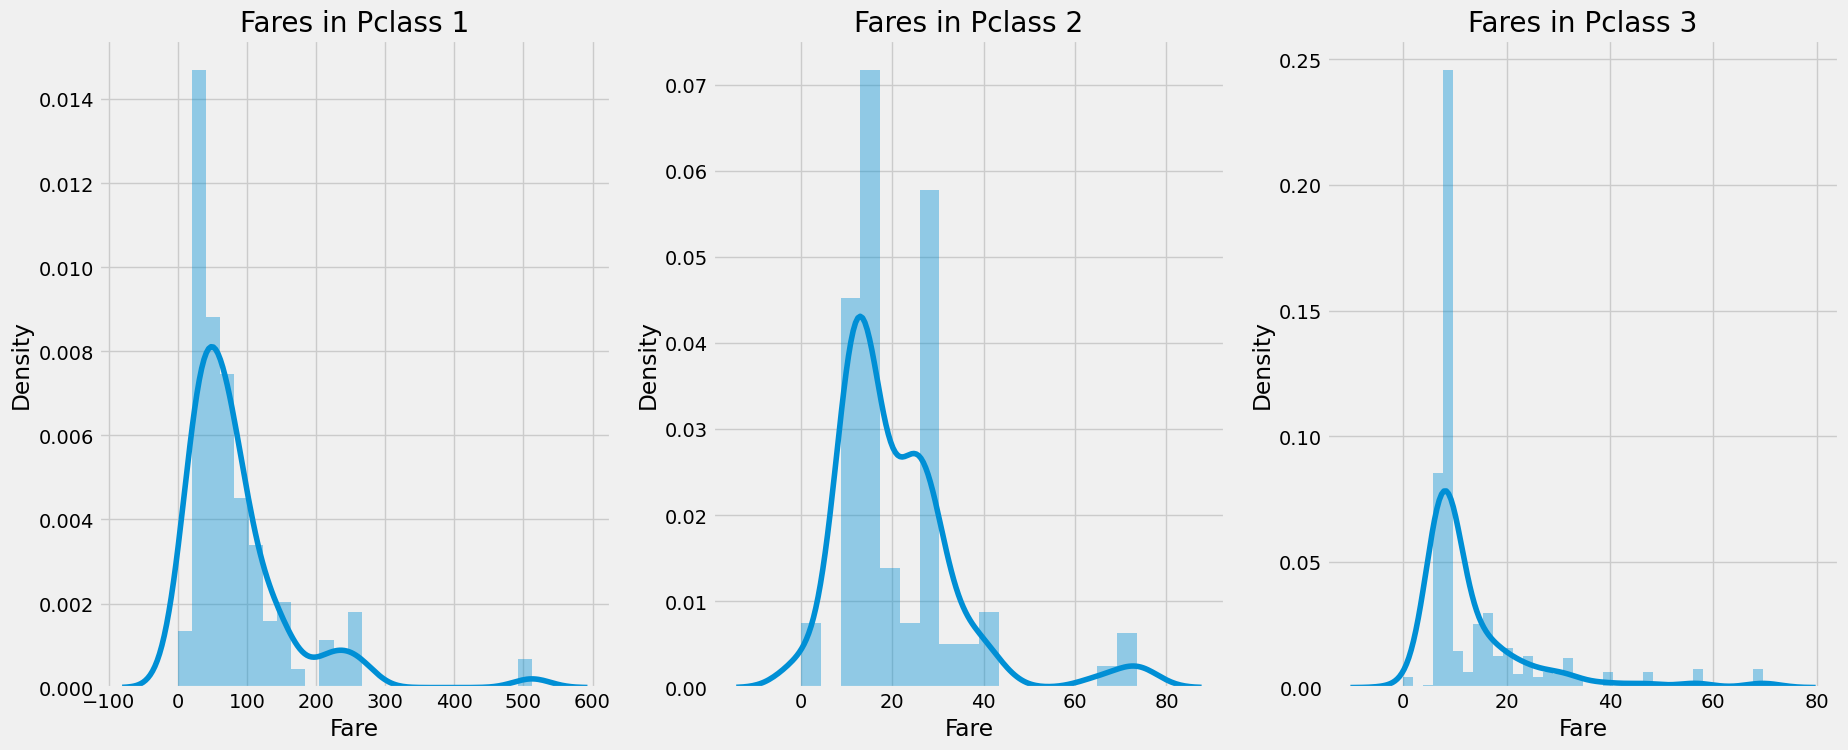

In [32]:
fig,axes=plt.subplots(1,3,figsize=(20,8))
sns.distplot(ttn[ttn['Pclass']==1].Fare,ax=axes[0])
axes[0].set_title('Fares in Pclass 1')
sns.distplot(ttn[ttn['Pclass']==2].Fare,ax=axes[1])
axes[1].set_title('Fares in Pclass 2')
sns.distplot(ttn[ttn['Pclass']==3].Fare,ax=axes[2])
axes[2].set_title('Fares in Pclass 3')
plt.show()

- 이제 분석자는 지금까지 나온 feature 들에 대해서 상관관계를 분석해 보기 위해 heatmap을 사용하네요
- 상관관계를 표시하는데 많이 사용하는 방법입니다.

In [33]:
ttn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial'],
      dtype='object')

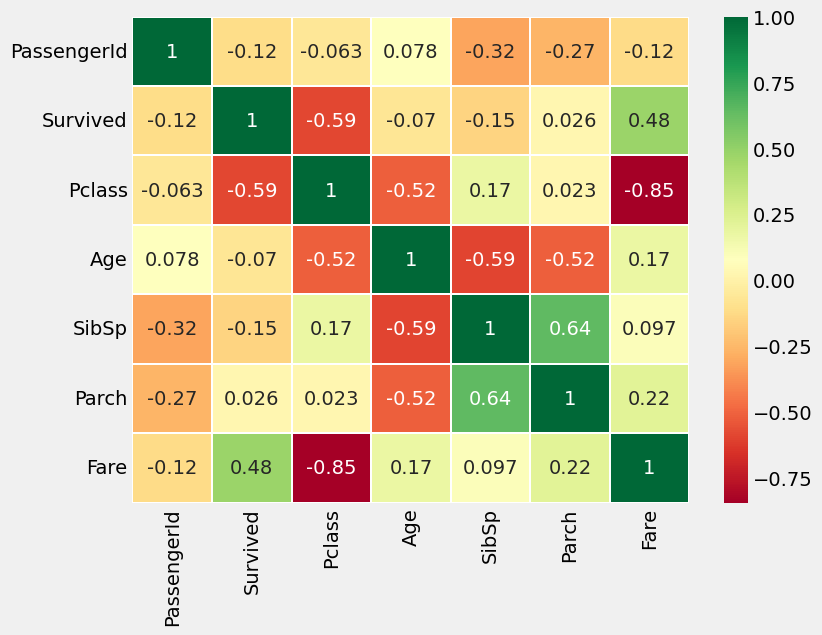

In [34]:
# 보통 상관계수를 구해서 heatmap으로 표시하여 분석합니다.
# 이때 Name 데이터는 명목척도이기 때문에 상관관계를 분석할 수 없겠죠?
cor = ttn[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(cor.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

- 분석은 이제 기존 feature 에서 새롭게 feature를 추춣해냅니다.
- 먼저 'Age' 를 일정 간격으로 분류 등급으로 나누고 있습니다.

In [35]:
ttn['Age_band']=0
ttn.loc[ttn['Age']<=16,'Age_band']=0
ttn.loc[(ttn['Age']>16)&(ttn['Age']<=32),'Age_band']=1
ttn.loc[(ttn['Age']>32)&(ttn['Age']<=48),'Age_band']=2
ttn.loc[(ttn['Age']>48)&(ttn['Age']<=64),'Age_band']=3
ttn.loc[ttn['Age']>64,'Age_band']=4
ttn.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
ttn['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


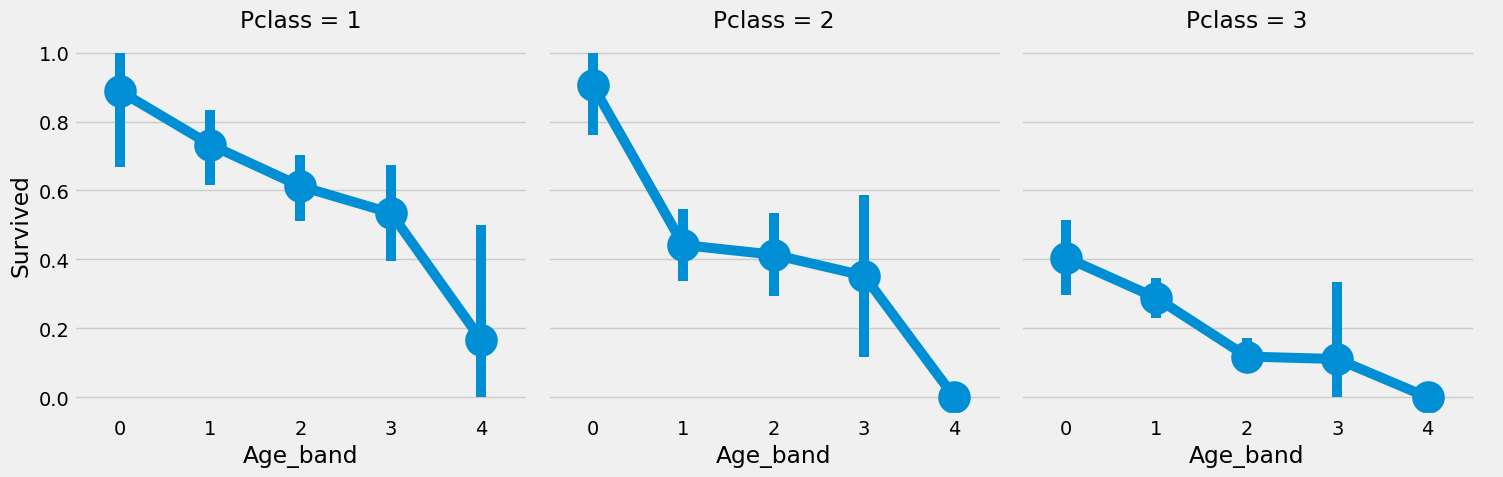

In [37]:
sns.catplot(x='Age_band',y='Survived',col='Pclass',kind='point',data=ttn)
plt.show()

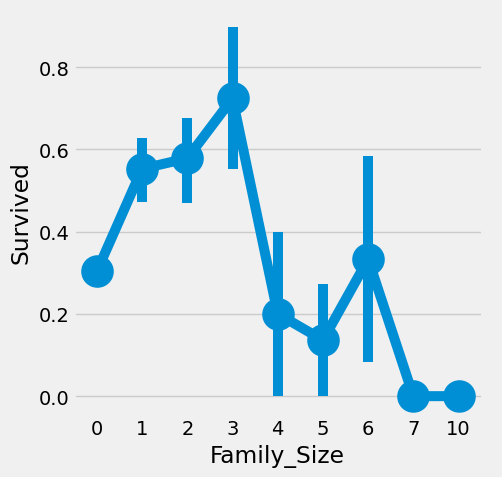

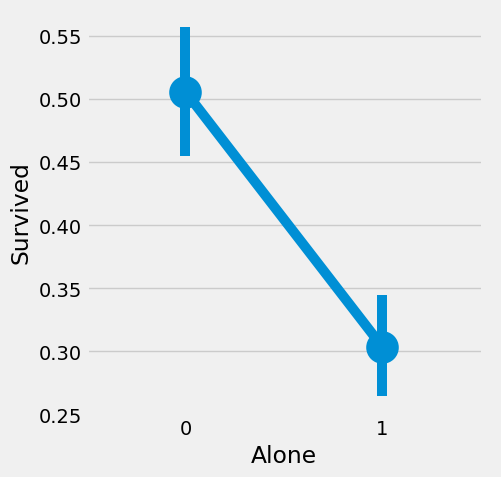

In [38]:
ttn['Family_Size']=0
ttn['Family_Size']=ttn['Parch']+ttn['SibSp']#family size
ttn['Alone']=0
ttn.loc[ttn.Family_Size==0,'Alone']=1#Alone

fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.catplot(x='Family_Size',y='Survived',kind='point',data=ttn,ax=axes[0])
axes[0].set_title('Family_Size vs Survived')
sns.catplot(x='Alone',y='Survived',kind='point',data=ttn,ax=axes[1])
axes[1].set_title('Alone vs Survived')
plt.close(1)
plt.show()

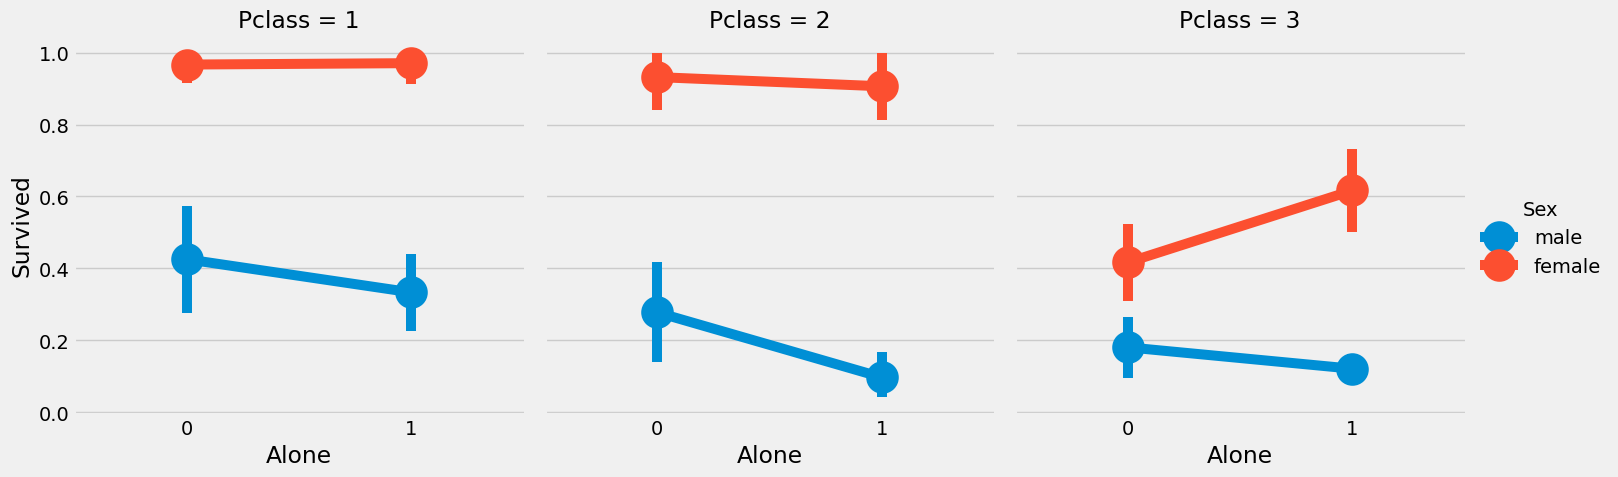

In [39]:
sns.catplot(x='Alone',y='Survived',data=ttn,hue='Sex',col='Pclass',kind='point')
plt.show()

In [40]:
ttn['Fare_Range']=pd.qcut(ttn['Fare'],4) # pandas qcut 은 분위 위치로 데이터를 나누는 메서드 입니다.
ttn.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [41]:
ttn['Fare_cat']=0
ttn.loc[ttn['Fare']<=7.91,'Fare_cat']=0
ttn.loc[(ttn['Fare']>7.91)&(ttn['Fare']<=14.454),'Fare_cat']=1
ttn.loc[(ttn['Fare']>14.454)&(ttn['Fare']<=31),'Fare_cat']=2
ttn.loc[(ttn['Fare']>31)&(ttn['Fare']<=513),'Fare_cat']=3

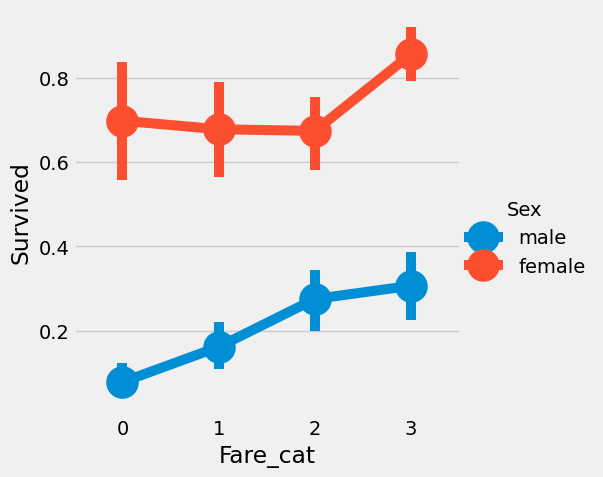

In [42]:
sns.catplot(x='Fare_cat',y='Survived',data=ttn,hue='Sex',kind='point')
plt.show()

- 추가적으로 데이터 feature들 중 문자열로 된 feature 들을 dummy 변수로 변환합니다.

In [43]:
ttn['Sex'].replace(['male','female'],[0,1],inplace=True)
ttn['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
ttn['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

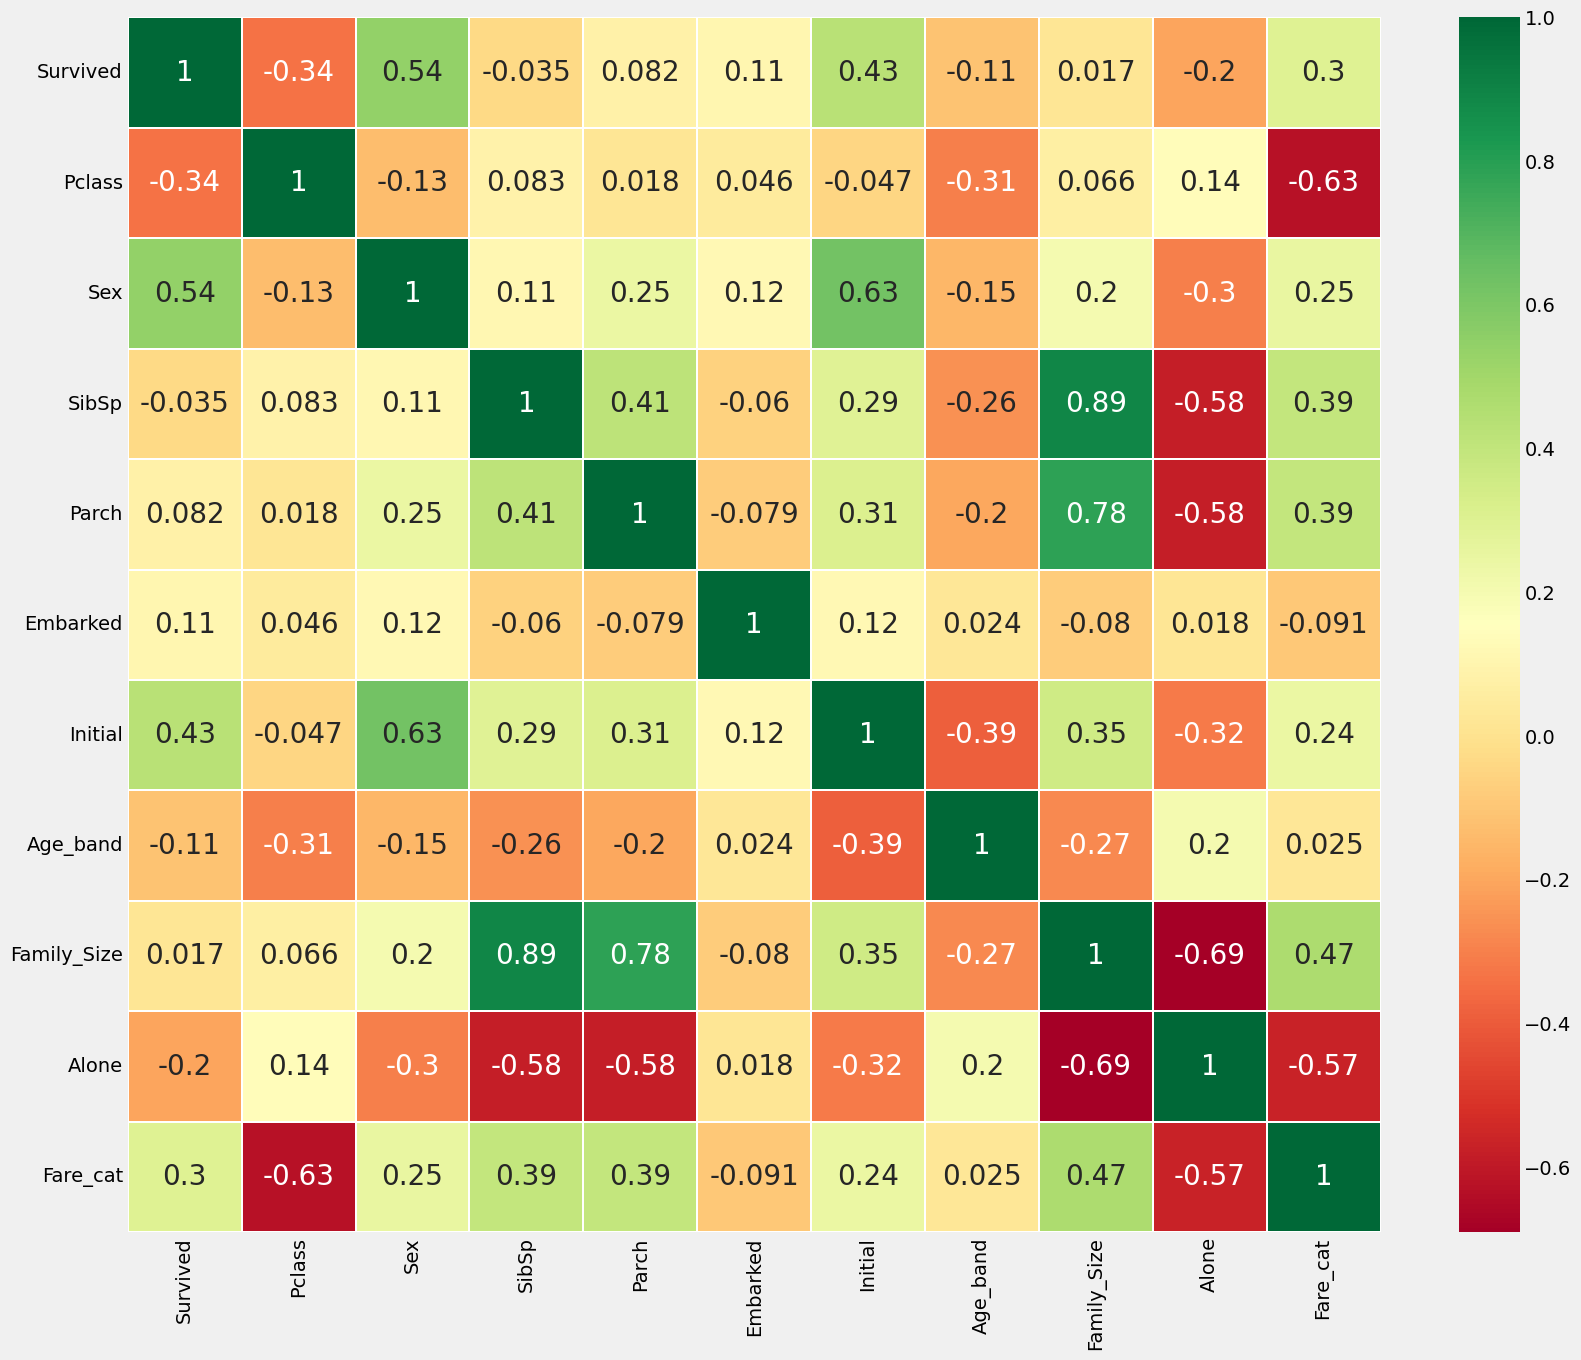

In [44]:
ttn.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(ttn.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 이후로는 생존 예측 모델이 진행 됩니다.

- 사용된 모델은 다음과 같습니다.
- 새로운 모델을 개발하는 것이 아니라면 보통 여러 기법의 모델을 사용하여 벤치마킹하여 결과를 비교하고
- 경우에 따라서는 여러 모델을 중복으로 사용합니다.

      (1) Logistic Regression

      (2) SVM (Support Vector Machines)
      
      (3) Random Forest
      
      (4) K-Nearest Neighbours
      
      (5) Naive Bayes
      
      (6) Decision Tree
      
      (7) ??

In [45]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [48]:
train,test=train_test_split(ttn,test_size=0.3,random_state=0,stratify=ttn['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=ttn[ttn.columns[1:]]
Y=ttn['Survived']

# SVM (Support vector machines)

- SVM은 분류를 하는 구릅을 나누는 사이에 공간이 최대로 되는 분리 알고리즘을 찾는 것이 SVM 이고 이때 데이터를 좀더 잘 분류하도록 다차원공간에 배치하는 함수를 커널이라고 합니다.

- 여기서는 이 커널을 방사형 (radial) 사용한 SVM 이라는 뜻입니다.

In [49]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


# Logistic regression

- 이진 선형회귀 입니다.
- 입력 feature 변수의 선형회귀를 logistic 으로 변환하여 0~1 사이의 관계로 사상한 회귀분석입니다.

In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


# DecisionTree

- 데이터의 feature를 통해서 확률적 (또는 정보적) 순수성과 혼탁정도로 지속적으로 분류 과정을 세분화해 나가는 방법입니다.

In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


# K-Nearest Neighbours(KNN)

- feature 를 통한 데이터간 거리적 유사성을 통해서 분류하는 기법입니다.
- k개 중점을 정하고 그 중점으로 부터 최근접한 형태로 데이터의 분류를 진행하는 알고리즘 입니다.

In [52]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


- 이부분은 좀 실망스럽습니다. 과거에 했던 분석이라 그런지 조금 불편하네요
- 분석자의 의도는 Grid Search 를 통해서  K 최근접 중점 갯수 파라메터를 찾고자 한것 같습니다.
- 차라리 정확히 Grid Search를 작성하던지 기존 분석 라이브러리의 메서드를 사용하는 것이 좋았을 것 같네요.

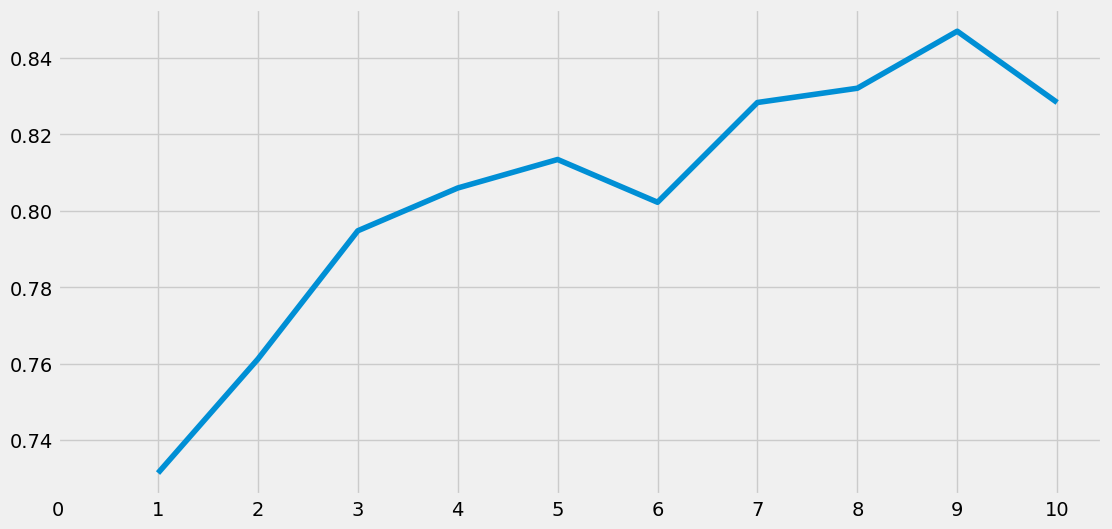

Accuracies for different values of n are: [[0.73134328]
 [0.76119403]
 [0.79477612]
 [0.80597015]
 [0.81343284]
 [0.80223881]
 [0.82835821]
 [0.83208955]
 [0.84701493]
 [0.82835821]] with the max value as  0.8470149253731343


In [75]:
a_index=list(range(1,11))
a = []   # 현재 pandas 에는 append 가 depreacated 되었습니다. 그냥 리스트를 사용합니다.
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in range(1,11):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction=model.predict(test_X)
  a.append(metrics.accuracy_score(prediction,test_Y))

a = pd.DataFrame(a,index=a_index)
plt.plot(a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

# Gaussian Naive Bayes
- 기본적으로 베이지안 확률 즉, 조건부 확률을 사전 확률에 이벤트 (feature)들의 발생확률 곱해서 구하는 방법입니다.

- 즉, 타이나틱 정보에 간단히 비교하자만 입력 feature  들의 확률에 기존 생존 확률을 더해서 조건부 확률을 만들어 생존 확률의 feature 조건에서의 생존확률을 구하는 방식입니다.

- 이때 Gaussian 이라 함은 각 feature 들에 대한 샘플들의 분포가 정규분포형태일 것이라고 가정하는 것을 뜻합니다. 즉, 정확한 모수의 확률을 알수 없고 샘플에 대한 경우의 수만 있을 때 이 샘플의 feature 가 특정 형태의 정규분포 일것이라는 가정하에서 정규분포에 맞춰가는 것입니다.

In [76]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


# RandomForest

- 대표적인 앙상블(ensemble) 기법입니다.
- 앙상블 기법은 약한 알고리즘을 여러개 모와서 강한 알고리즘을 만든다는 개념입니다.
- 대표적인 방법은 voting, bagging, stacking

- 이중 RandomForest 는 bagging 방법을 사용한 알고리즘입니다.
- 랜덤한 하위 데이터셋을 만들고, feature 의 의사결정 트리도 만들어서 앙상블을 진행합니다.

In [77]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8246268656716418


# cross validation

- CV 는 데이터를 몇개의 하위 데이터로 분류하여 훈련과 검증을 반복하는 방법입니다.
- 하위 데이터셋이 5개라면 하나는 테스트에 사용하고 나머지 4개로 학습과 테스트를 진행합니다. 이를 5번 돌아가서면 진행하는 방식입니다.

- 개인적으로 현재 총 데이터가 891개 이하이라서 하위 데이터셋을 너무 잘개 나누면 각 feature의 경우의 수가 너무 작아지는데 현재 래퍼런스에서는 10개의 하위 데이터셋으로 나누고 있네요.. 좋은 구성인지 잘 모르겠습니다.


In [83]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, shuffle=True, random_state=22)
# random_state 는 random seed와 같습니다. 요즘은 shuffle 이 True여야 사용가능니다.
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.802497,0.047054
Naive Bayes,0.795843,0.054861
Random Forest,0.821586,0.046277


- 하지만 아래와 같은 모델 벤치마킹 분석은 좋은 것 같습니다.
- 모델의 성능지표를 좀더 분포형태로 보여주고 있네요.

<Axes: >

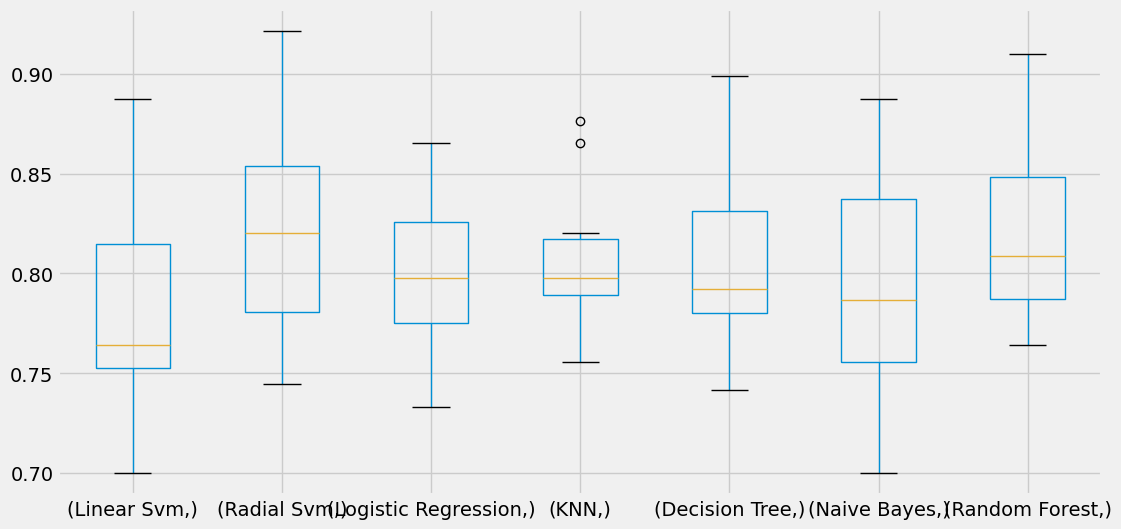

In [84]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

- 이미 위에서 수치로 나온것을 시각적으로 한번 더 표현해줬네요

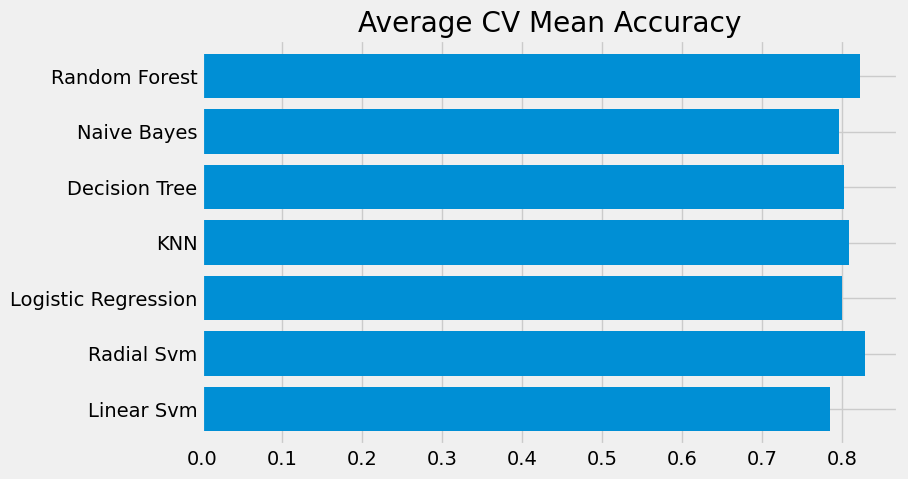

In [86]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# confusion Matrix
- 분류 모델의 성능을 분석하는데 가장 많이 쓰이는 방식입니다.
- 정확한참 분류(TP), 잘못된 참분류(FP), 정확한 거짓분류(TN), 잘못된 거짓 분류(FN) 의 형태로 메트릭스를 만들죠
- 이 결과 테이블을 가지고 여러가지 분석이 가능합니다.


- 코드가 너무 반복이네요. 여러분이라면 for 문같은 것으로 고치고 싶겠지요? 결과만 따로 딕트나 리스트에 담아서 별도의 그래프출력 함수에 돌려버리고 싶네요.

- 일단 title 조정만 좀 하겠습니다.

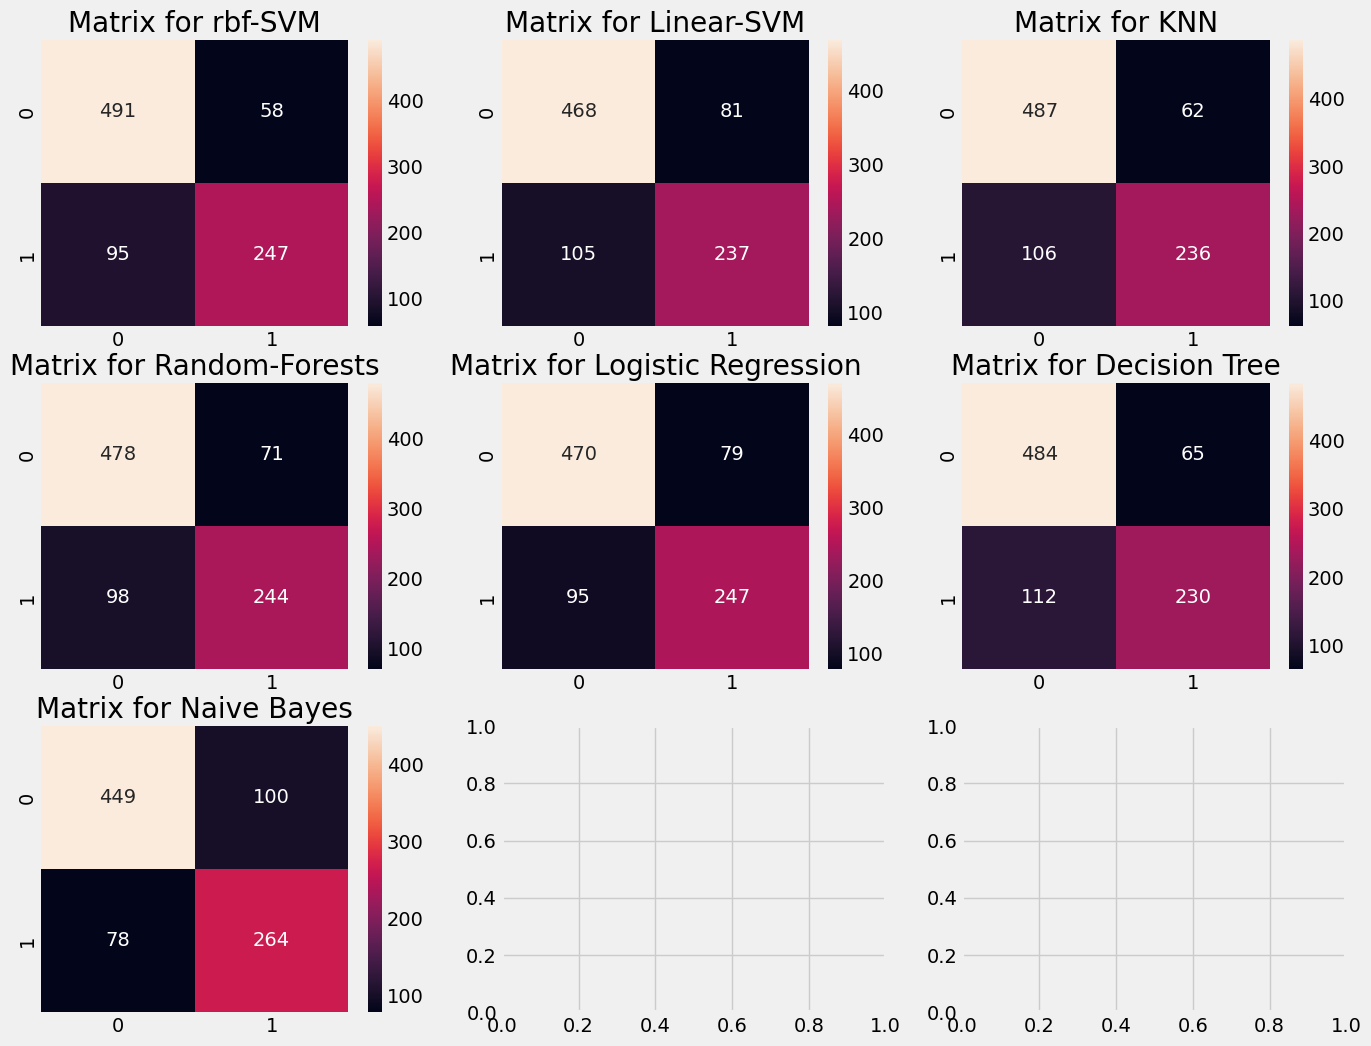

In [92]:
title_font = {'fontsize': 3, 'fontweight': 'bold'}

fig,ax=plt.subplots(3,3,figsize=(15,12))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

# Hyper-Parameters Tuning

- 앞에서 KNN 진행할때 한것과 같은 작업입니다. 이번에는 라이브러리의 도움을 받아서 진행하네요.

- 여러게의 파라메터를 순차적으로 바꿔 넣어가며 가장 좋은 결과를 찾습니다.

- 파라메터 입력이 가능한 SVM 과 RandomForest를 진행하네요

In [93]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [94]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


# Ensembling
- 결국 80% 대 정확도에 만족을 할 수 없기에 앙상블 기법을 적용하네요

- 래퍼런스에는 voting, Bagging, Boosting 이라고 나와있네요.
- 사실 Boosting 은 Stacking 기법의 일종입니다.


- Voting

In [95]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237952559300874


- Bagging

In [97]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [98]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


- Boosting

- adboost

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


# XGBoost

- 의사결정 트리모델의 Boosting 기법을 적용한 독자적인 알고리즘 입니다. 일반적으로 여러 분석에서 좋은 결과를 보이는데 이번에는 그렇지 못한것같네요.

In [101]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


- 하이퍼 파라메터 튜딩을 시도합니다.

In [102]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


- confusion Matrix 도 찍어봐야 겠죠. 래퍼에서는 아다부스트 기법을 사용하네요.

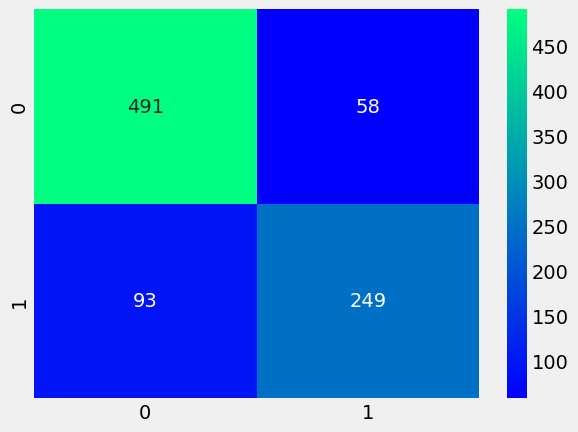

In [103]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

- xgboost도 해보죠

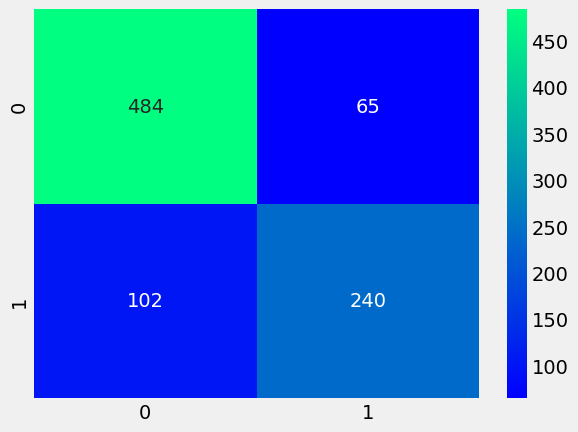

In [104]:
xgboost=xg.XGBClassifier(n_estimators=100,learning_rate=0.1)
result=cross_val_predict(xgboost,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

- 중요한 분석 중에 하나입니다.
- 어떠한 feature가 어느 정도 모델에 기여 했는나는 정보입니다.
- 데이터 분석에서 사실 아주 중요한 부분입니다.
- 딥러닝에 약점 중에 하나이기도 하죠

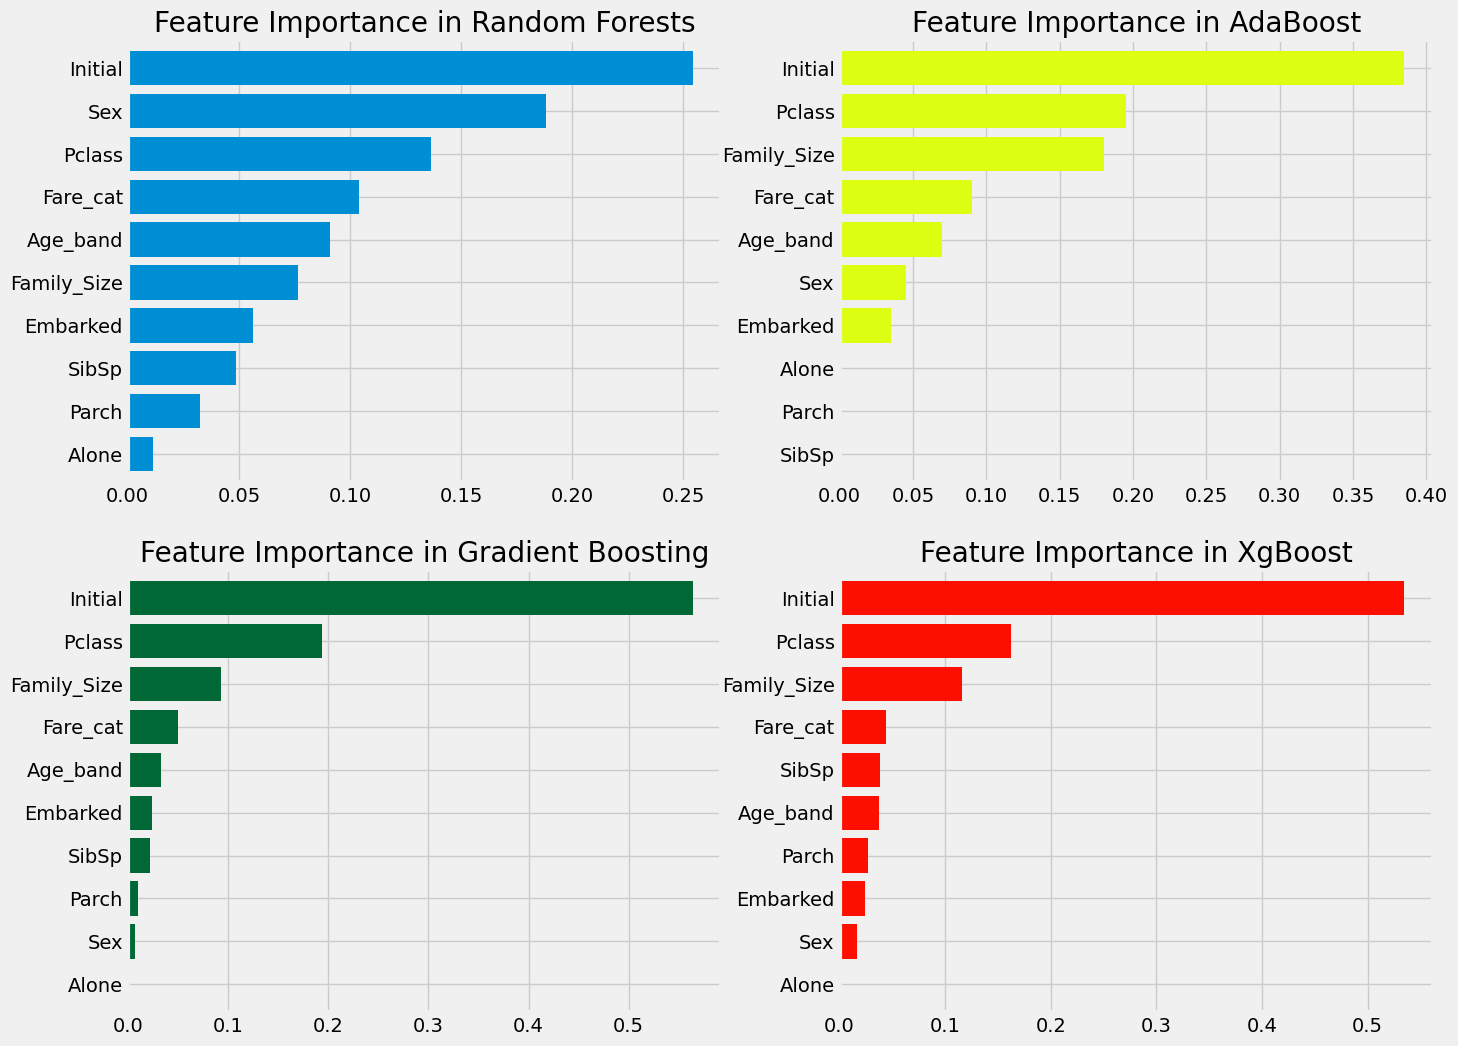

In [105]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

# 다음은 시각화의 추가적인 부분입니다.

# 파이썬 - 시각화

# matplotlib

- matplotlib-example
https://matplotlib.org/stable/gallery/index.html \
https://matplotlib.org/stable/tutorials/index.html \
https://matplotlib.org/stable/tutorials/lifecycle.html#sphx-glr-tutorials-lifecycle-py


## matplotlib 그래프의 구성 인스턴스

	1) figure : 인스턴스 그림을 그리기 위한 영역을 제공
	2) Axes : 그림이 그려지는 고정된 영역의 좌표계를 제공



| 인수              | 예제 값                                                 | 설명          |
| --------------- | ---------------------------------------------------- | ----------- |
| color           | 'red','blue' 같은 색상명 문자열이나 RGB 색코드                    | 색상지정        |
| alpha           | 0.0 완전투명, 1.0 불투명 사이 실수                              | 투명도         |
| lw, linewidth   | 실수                                                   | 선 너비        |
| ls, linestyle   | '-' 실선, '--' 파선, ':' 점선, '.-'파점선                     | 선 유형        |
| Marker          | +,o,* (십자,원,별), s (사각), . (작은점), 1,2, (다른 각을 가진 삼각형) | 데이터 포인트에 표신 |
| Markersize      | 실수                                                   | 마터 크기       |
| Markerfacecolor | 색 지정 앞과 같음                                           | 마커 색상       |
| Markeredgewidth | 실수                                                   | 마커 선 너비     |
| Markeredgecolor | 색 지정 앞과 같음                                           | 마커 선 색상     |



 - plot의 종류

ax.plot \
ax.step \
ax.bar \
ax.hist \
ax.errorbar \
ax.scatter \
ax.fill_between \
ax.quiver \

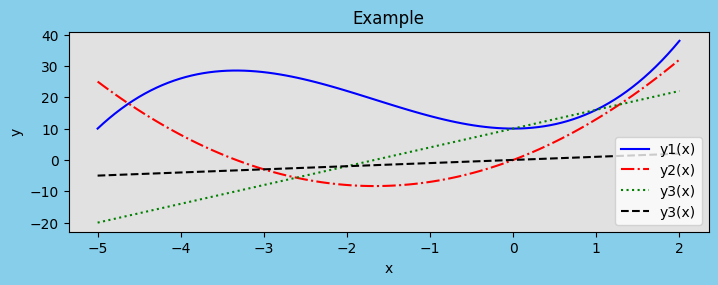

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x= np.linspace(-5,2, 100)

y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10
y4 = x


#figure 객체생성
fig = plt.figure(figsize=(8,2.5), facecolor="skyblue") # hex code 가능 "#f1f1f1"

#실제 그래프나 그림이 들어는 외각선 제공
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

# 해당 외각선에 데이터를 넣어 그림 그리기
ax.plot(x, y1, color="blue", linestyle='-', label="y1(x)")
ax.plot(x, y2, color="red", linestyle='-.', label="y2(x)")
ax.plot(x, y3, color="green", linestyle=':', label="y3(x)")
ax.plot(x, y4, color="black", linestyle='--', label="y3(x)")

# 추가적인 꾸며주기
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_yticks([])
# ax.set_xticks([])
# ax.set_ylim()
# ax.set_xlim()
ax.legend(loc=0)
ax.set_title("Example")

# 이미지 저장하기
fig.savefig("filename.png", dpi=100,facecolor="skyblue")

SubPlot 만들기와 xlim, ylim 조정,

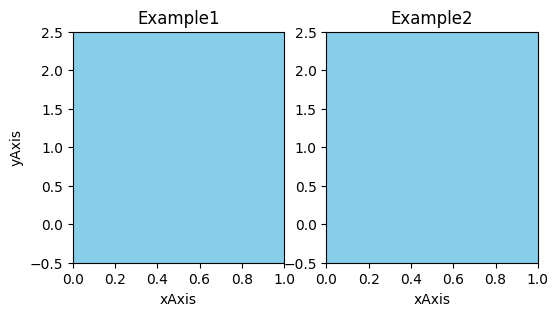

In [ ]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(1,2,1)
ax1.set(xlim=[0., 1.], ylim=[-0.5, 2.5],
        title='Example1', xlabel='xAxis', ylabel='yAxis',facecolor="skyblue")
#각 인자의 set 형태로 옵션을 줄 수 있음.
ax2 = fig.add_subplot(1,2,2)
ax2.set(xlim=[0., 1.], ylim=[-0.5, 2.5],
        title='Example2', xlabel='xAxis',facecolor="skyblue")
plt.show()

### figure, ax 같이 생성하기

Text(0.5, 1.0, 'Example')

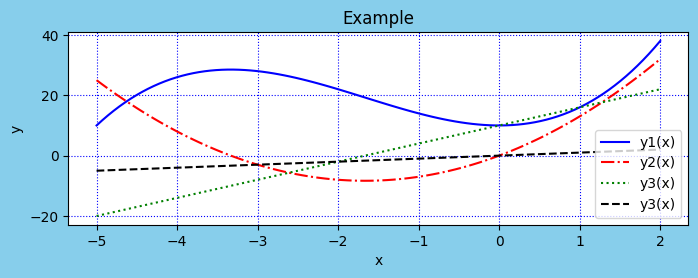

In [ ]:
fig, ax = plt.subplots(figsize=(8,2.5), facecolor="skyblue")
ax.plot(x, y1, color="blue", linestyle='-', label="y1(x)")
ax.plot(x, y2, color="red", linestyle='-.', label="y2(x)")
ax.plot(x, y3, color="green", linestyle=':', label="y3(x)")
ax.plot(x, y4, color="black", linestyle='--', label="y3(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(color="blue", which="both",ls=':')
ax.legend(loc=0) # loc 래전트 위치
ax.set_title("Example")

### Text 입력 및 Annotation

Text(2, 0.1, ' $ \\hat Y \\quad=\\quad \\lambda\\sum_{i=1}^{k}\\quad X$')

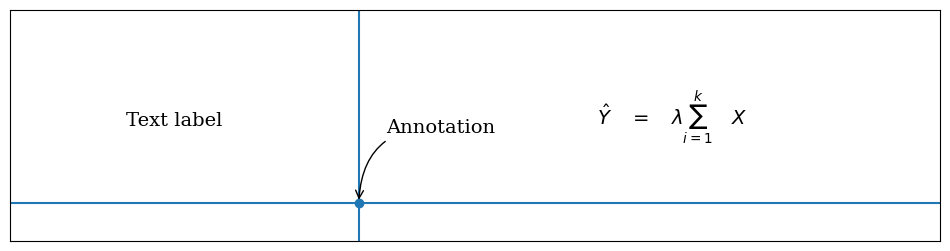

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5,3.5)
ax.set_ylim(-0.05,0.25)
ax.axhline(0)
ax.axvline(1)

# text label
ax.text(0,0.1, "Text label", fontsize=14, family="serif")

# annotation
ax.plot(1,0, "o")
ax.annotate("Annotation", fontsize=14, family="serif", xy=(1,0),
            xycoords="data", xytext=(+20,+50), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.5"))
ax.text(2,0.1, r" $ \hat Y \quad=\quad \lambda\sum_{i=1}^{k}\quad X$", fontsize=14, family="serif")

### ticks와 lim 의 scale 표현

Text(0.5, 1.0, 'equal')

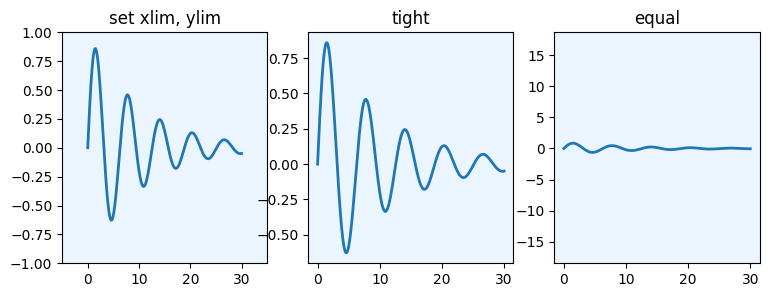

In [ ]:
x = np.linspace(0,30,500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1,3, figsize=(9,3), subplot_kw = {'facecolor':"#ebf5ff"})
axes[0].plot(x,y, lw=2)
axes[0].set_xlim(-5,35)
axes[0].set_ylim(-1,1)
axes[0].set_title("set xlim, ylim")

axes[1].plot(x,y, lw=2)
axes[1].axis("tight")
axes[1].set_title("tight")

axes[2].plot(x,y, lw=2)
axes[2].axis("equal")
axes[2].set_title("equal")

# Seaborn

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("https://kanaries-app.s3.ap-northeast-1.amazonaws.com/public-datasets/bike_sharing_dc.csv", parse_dates=['date'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


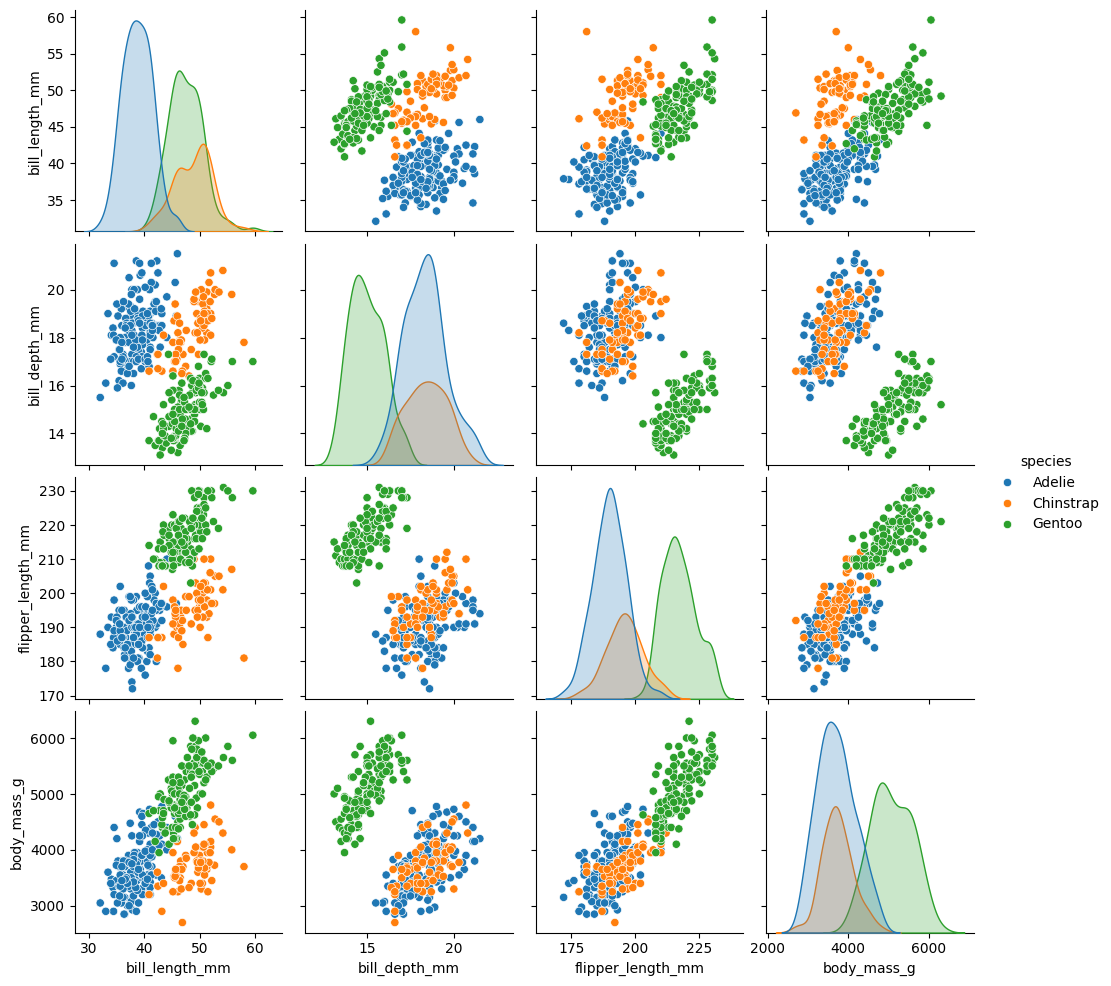

In [ ]:
df = sns.load_dataset('penguins')
sns.pairplot(df, hue='species')
df

# plotly
  - graph_objects : 작성자가 커스터마이징
  - express : 기존 카테고리 타입으로 빠르게 구성 (세부 조정으로 graph_objects 사용해야함)



- 두가지 Plotly 생성 형식

- plotly : express

|종류|사용형태|
|-----|-----|
|Basics:| scatter, line, area, bar, funnel, timeline |
|Part-of-Whole:| pie, sunburst, treemap, icicle, funnel_area|
|1D Distributions:| histogram, box, violin, strip, ecdf|
|2D Distributions:| density_heatmap, density_contour|
|Matrix or Image Input:| imshow|
|3-Dimensional:| scatter_3d, line_3d|
|Multidimensional:| scatter_matrix, parallel_coordinates, parallel_categories|
|Tile Maps:| scatter_mapbox, line_mapbox, choropleth_mapbox, density_mapbox|
|Outline Maps:| scatter_geo, line_geo, choropleth|
|Polar Charts:| scatter_polar, line_polar, bar_polar|
|Ternary Charts:| scatter_ternary, line_ternary|

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

margine = [20, 20, 50, 50]

# graph_objects
fig_go = go.Figure(
    # Data 입력
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    # layout 입력
    layout=go.Layout(
        width=600,
        height=400,
        margin_l=margine[0],
        margin_r=margine[1],
        margin_b=margine[2],
        margin_t=margine[3],
        xaxis_title=dict(
          text="<b>X Label</b>"
        ),
        yaxis_title="<b>Y Label(%)</b>",
        font=dict(
          family="Courier New, Monospace",
          size=12,
          color="#000000"
        ),
        paper_bgcolor="LightSteelBlue",
        showlegend=False,
        title_x = 0.5, title_y = 0.9,title_xanchor = ("center"), title_yanchor = ("middle"),
        title_font_size = 25,
        title_font_color = "red",
        title_font_family = "Times",
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
        )
    )

fig_go.show()

# express
# px.bar() 함수를 활용해서 bar chart 생성과 동시에 Data, Layout 값 입력
fig_ex = px.bar(
    x=["a", "b", "c"],
    y=[1, 3, 2],
    width=600,
    height=400,
    title="A Figure Specified By express"
    )

fig_ex.update_traces(
    textfont_size=14,
    textposition='auto',
)

fig.update_xaxes(title_text='Total Bill ($)',
                 title_font_size =30,
                 title_font_color='crimson',
                 title_font_family='Courier',
                 title_standoff= 100)

fig.update_yaxes(title_text='Tip ($)',
                 title_font_size =30,
                 title_font_color='crimson',
                 title_font_family='Courier',
                 title_standoff= 100)

fig_ex .update_layout(
        margin_l=margine[0],
        margin_r=margine[1],
        margin_b=margine[2],
        margin_t=margine[3],paper_bgcolor="LightSteelBlue",)

fig_ex.update_layout(
                 title_x = 0.5,
                 title_y = 0.9,
                 title_xanchor = "center",
                 title_yanchor = "middle",
                 title_font_size = 25,
                 title_font_color = "red",
                 title_font_family = "Times",
                 )

fig_ex.show()

- Graph update

|update type|contents|
|-----------|--------|
|add_trace()|
|update_trace()|
|update_layout()|
|update_xaxes()|
|update_yaxes()|


In [ ]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")

#fig.add_trace(
#    go.Scatter(
#        x=[2, 4],
#        y=[4, 8],
#        mode="lines",
#        line=go.scatter.Line(color="gray"),
#        showlegend=False)
#)

fig.show()

In [ ]:
from plotly.subplots import make_subplots

# subplot 생성
fig = make_subplots(rows=1, cols=2)

# Trace 추가하기
fig.add_scatter(y=[4, 2, 3.5], mode="markers",
                marker=dict(size=20, color="LightSeaGreen"),
                name="a", row=1, col=1)

fig.add_bar(y=[2, 1, 3],
            marker=dict(color="MediumPurple"),
            name="b", row=1, col=1)

fig.add_scatter(y=[2, 3.5, 4], mode="markers",
                marker=dict(size=20, color="MediumPurple"),
                name="c", row=1, col=2)

fig.add_bar(y=[1, 3, 2],
            marker=dict(color="LightSeaGreen"),
            name="d", row=1, col=2)

# 한번에 Bar plot 만 파란색으로 바꾸기
# fig.update_traces(marker=dict(color="RoyalBlue"),
#                  selector=dict(type="bar"))

fig.show()

In [ ]:

#그래프 생성
fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

# 타이틀 추가하기
# fig.update_layout(title_text="Using update_layout() With Graph Object Figures",title_font_size=30)

fig.show()

In [ ]:

#데이터 생성
df = px.data.tips()
x = df["total_bill"]
y = df["tip"]

# 그래프 그리기
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# 축 타이틀 추가하기
fig.update_xaxes(title_text='Total Bill ($)')
fig.update_yaxes(title_text='Tip ($)')

fig.show()